# 1. Introdução:

In [1]:
!cat /proc/cpuinfo


processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

O  desafio consiste em realizar uma análise exploratória de dados. O conjunto de dados fornecido para esta tarefa contém informações relevantes que exigem uma investigação aprofundada.

**Principais Tarefas:**
- Realizar Análise Exploratória de Dados (AED) no conjunto de dados.
- Identificar padrões, tendências e insights significativos.


**Objetivos:**
- Compreender a natureza dos dados disponíveis.
- Apresentar insights relevantes por meio de visualizações.



# 2. Importação de Bibliotecas e Carregamento de Dados

## 2.1 Importação de bibliotecas

In [ ]:
import pickle
import pandas as pd

# Importando bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression

In [ ]:
# Configurações para visualização no notebook
%matplotlib inline
# Paleta de cores padrão
palette = sns.color_palette("Set1")

## 2.2 Coleta dos dados

In [ ]:
file_name = 'ofertas_relampago.csv'

df = pd.read_csv(file_name, na_values=[''], keep_default_na=False)

# Substituir valores nulos na coluna 'ORIGIN' por 'NA'
# O pandas substitui automaticamente os valores de NA (Not Available) por NaN (Not a Number) ao carregar dados do Excel para um DataFrame.
# Isso acontece para representar valores ausentes ou nulos no pandas.
# A fonte de dados original, contém os dados preenchidos como 'NA'
df['ORIGIN'] = df['ORIGIN'].replace({pd.NA: 'NA'})

pickle_path = 'dados_ofertas_relampago.pkl'

# Salvar os dados como pickle
with open(pickle_path, 'wb') as f:
    pickle.dump(df, f)

# Carregar dados do pickle
with open(pickle_path, 'rb') as f:
    df = pickle.load(f)

df.head()

Saving ofertas_relampago.csv to ofertas_relampago.csv


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NA,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NA,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NA,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NA,none,COMPUTERS,CE,MLM-HEADPHONES


In [ ]:
#Se já tiver o arquivo carregado, pode chamar
#pickle_path = 'dados_ofertas_relampago.pkl'
#df = pd.read_pickle(pickle_path)

In [ ]:
dados = df.copy()

In [ ]:
# Informações gerais sobre o conjunto de dados
dados.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NA,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NA,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NA,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NA,none,COMPUTERS,CE,MLM-HEADPHONES


## 2.3 Limpeza e tratamento dos dados

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     48746 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

In [ ]:
dados.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


O Valor mínimo no campo REMAINING_STOCK_AFTER_END pode indicar:
1. Que foi vendido a mais do que tinha no estoque
2. O Sinal não deveria ser negativo
3. O valor deveria ser "0"

O valor vendido nas ofertas relâmpago varia de 0,28 a 4836,57 reais

A quantidade vendida nas ofertas relâmpago varia de 1 a 1646 unidades

Aproximadamente metade dos dados sobre o valor vendido e a quantidade vendida está faltando.

### 2.3.1 Manipulação de dados temporais

Adicionando mês/ dia da semana e duração

In [ ]:
# Convertendo campos temporais para o formato datetime
dados['OFFER_START_DTTM'] = pd.to_datetime(dados['OFFER_START_DTTM'])
dados['OFFER_FINISH_DTTM'] = pd.to_datetime(dados['OFFER_FINISH_DTTM'])

# ADD MES
dados['MONTH'] = dados['OFFER_START_DTTM'].dt.month

# ADD dia da semana
dados['DAY_OF_WEEK_START'] = dados['OFFER_START_DTTM'].dt.day_name()
dados['DAY_OF_WEEK_FINISH'] = dados['OFFER_FINISH_DTTM'].dt.day_name()

# ADD tempo de duração da oferta em horas
dados['DURATION_HOURS'] = (dados['OFFER_FINISH_DTTM'] - dados['OFFER_START_DTTM']).dt.total_seconds() / 3600

dados[['OFFER_START_DTTM', 'DAY_OF_WEEK_START', 'OFFER_FINISH_DTTM', 'DAY_OF_WEEK_FINISH', 'DURATION_HOURS', 'MONTH']].head()


,OFFER_START_DTTM,DAY_OF_WEEK_START,OFFER_FINISH_DTTM,DAY_OF_WEEK_FINISH,DURATION_HOURS,MONTH
0,2021-06-22 16:00:00+00:00,Tuesday,2021-06-22 23:02:43+00:00,Tuesday,7.045278,6
1,2021-06-22 13:00:00+00:00,Tuesday,2021-06-22 19:00:02+00:00,Tuesday,6.000556,6
2,2021-06-22 07:00:00+00:00,Tuesday,2021-06-22 13:00:01+00:00,Tuesday,6.000278,6
3,2021-06-22 19:00:00+00:00,Tuesday,2021-06-23 01:36:12+00:00,Wednesday,6.603333,6
4,2021-06-22 13:00:00+00:00,Tuesday,2021-06-22 15:48:12+00:00,Tuesday,2.803333,6


In [ ]:
# Ordenando o DataFrame pela coluna DURATION_HOURS em ordem crescente
ofertas_rapidas = dados.sort_values(by='DURATION_HOURS', ascending=True)

ofertas_rapidas[['OFFER_START_DTTM', 'OFFER_FINISH_DTTM', 'DURATION_HOURS', 'SOLD_QUANTITY','REMAINING_STOCK_AFTER_END' ]]


,OFFER_START_DTTM,OFFER_FINISH_DTTM,DURATION_HOURS,SOLD_QUANTITY,REMAINING_STOCK_AFTER_END
35046,2021-07-05 13:00:00+00:00,2021-07-05 13:00:00+00:00,0.000000,NaN,5
3479,2021-06-26 16:00:00+00:00,2021-06-26 16:00:00+00:00,0.000000,NaN,65
44729,2021-06-29 07:00:00+00:00,2021-06-29 07:00:00+00:00,0.000000,NaN,5
40662,2021-06-15 13:00:00+00:00,2021-06-15 13:00:00+00:00,0.000000,NaN,5
35302,2021-07-05 13:00:00+00:00,2021-07-05 13:00:00+00:00,0.000000,NaN,15
...,...,...,...,...,...
28519,2021-07-21 19:00:00+00:00,2021-07-22 09:37:11+00:00,14.619722,NaN,5
28540,2021-07-21 19:00:00+00:00,2021-07-22 09:37:47+00:00,14.629722,6.0,9
28556,2021-07-21 19:00:00+00:00,2021-07-22 09:40:07+00:00,14.668611,1.0,9
28642,2021-07-21 18:00:00+00:00,2021-07-22 09:37:09+00:00,15.619167,NaN,100


Pode existir ofertas com tempo de duração de 0horas/minutos/segundos?
Acredito que seja um erro de base, vamos aprofundar

In [ ]:
# Contando casos com duração 0
casos_duracao_zero = dados[dados['DURATION_HOURS'] == 0]

total_casos = len(dados)

percentual_duracao_zero = len(casos_duracao_zero) / total_casos * 100

print(f"Número de casos com duração 0: {len(casos_duracao_zero)}")
print(f"Percentual em relação à base: {percentual_duracao_zero:.2f}%")


Número de casos com duração 0: 1314
Percentual em relação à base: 2.70%


Como o número é relativamente baixo, vamos seguir com a exclusão desses dados por parecer não fazer parte da regra de negócio da "oferta relâmpago" **(PERGUNTA 5)**

In [ ]:
# Removendo registros com duração 0
dados = dados[dados['DURATION_HOURS'] > 0]

dados.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47432 entries, 0 to 48745
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           47432 non-null  object             
 1   OFFER_START_DTTM           47432 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          47432 non-null  datetime64[ns, UTC]
 3   OFFER_TYPE                 47432 non-null  object             
 4   INVOLVED_STOCK             47432 non-null  int64              
 5   REMAINING_STOCK_AFTER_END  47432 non-null  int64              
 6   SOLD_AMOUNT                24579 non-null  float64            
 7   SOLD_QUANTITY              24579 non-null  float64            
 8   ORIGIN                     47432 non-null  object             
 9   SHIPPING_PAYMENT_TYPE      47432 non-null  object             
 10  DOM_DOMAIN_AGG1            47432 non-null  object             
 11  VE

### 2.3.2 Dados Ausentes e Duplicados:

In [ ]:
# Verificando dados duplicados

duplicatas = dados[dados.duplicated()]
duplicatas = duplicatas.sort_values(by=duplicatas.columns.tolist())

print(f'Número de duplicatas: {len(duplicatas)}')

# Exibindo as linhas duplicadas
print("Linhas duplicadas:")
duplicatas.head(6)


Número de duplicatas: 883
Linhas duplicadas:


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,MONTH,DAY_OF_WEEK_START,DAY_OF_WEEK_FINISH,DURATION_HOURS
39640,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:02+00:00,lightning_deal,5,3,47.14,1.0,NA,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,6,Tuesday,Tuesday,6.000556
39630,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:08+00:00,lightning_deal,5,4,NaN,NaN,NA,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,6,Tuesday,Tuesday,6.002222
40012,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:08+00:00,lightning_deal,15,15,NaN,NaN,NA,free_shipping,APPAREL ACCESORIES,APP & SPORTS,MLM-SUNGLASSES,6,Tuesday,Tuesday,6.002222
40276,2021-06-01,2021-06-01 13:00:00+00:00,2021-06-01 13:00:01+00:00,lightning_deal,5,5,NaN,NaN,NA,free_shipping,COMPUTERS,CE,MLM-COMPUTER_MONITORS,6,Tuesday,Tuesday,0.000278
39802,2021-06-01,2021-06-01 13:00:00+00:00,2021-06-01 19:00:07+00:00,lightning_deal,5,5,NaN,NaN,NA,free_shipping,APPAREL,APP & SPORTS,MLM-SHIRTS,6,Tuesday,Tuesday,6.001944
39831,2021-06-01,2021-06-01 13:00:00+00:00,2021-06-01 19:00:07+00:00,lightning_deal,5,5,NaN,NaN,NA,free_shipping,APPAREL ACCESORIES,APP & SPORTS,MLM-WRISTWATCHES,6,Tuesday,Tuesday,6.001944


In [ ]:
# Total de registros na amostra
total_registros = dados.shape[0]
dados_faltantes = dados.isnull().sum()
# Calculando a porcentagem de valores nulos para cada coluna
porcentagem_nulos = (dados_faltantes / total_registros) * 100

print("Porcentagem de valores nulos por coluna:")
porcentagem_nulos


Porcentagem de valores nulos por coluna:


OFFER_START_DATE              0.000000
OFFER_START_DTTM              0.000000
OFFER_FINISH_DTTM             0.000000
OFFER_TYPE                    0.000000
INVOLVED_STOCK                0.000000
REMAINING_STOCK_AFTER_END     0.000000
SOLD_AMOUNT                  48.180553
SOLD_QUANTITY                48.180553
ORIGIN                        0.000000
SHIPPING_PAYMENT_TYPE         0.000000
DOM_DOMAIN_AGG1               0.000000
VERTICAL                      0.000000
DOMAIN_ID                     0.000000
MONTH                         0.000000
DAY_OF_WEEK_START             0.000000
DAY_OF_WEEK_FINISH            0.000000
DURATION_HOURS                0.000000
dtype: float64

### 2.3.3 Vericação de consistência do campo SOLD_QUANTITY

In [ ]:
# Verificação se a coluna SOLC_QUANTITY tem os dados informados de forma consistente
#assim crio nova coluna para fazer a verificação


dados['SOLD_QUANTITY_CALCULATE'] = dados['INVOLVED_STOCK'] - dados['REMAINING_STOCK_AFTER_END']

# valores positivos e não nulos em SOLD_QUANTITY_CALCULATE
dados_filtrados = dados[dados['SOLD_QUANTITY_CALCULATE'] > 0].copy()

dados_filtrados['SOLD_QUANTITY'] = pd.to_numeric(dados_filtrados['SOLD_QUANTITY'], errors='coerce')

# Criar a coluna DIFF_QUANTITY
dados_filtrados['DIFF_QUANTITY'] = dados_filtrados['SOLD_QUANTITY'] - dados_filtrados['SOLD_QUANTITY_CALCULATE']

dados['SOLD_QUANTITY'].fillna(0, inplace=True)
# Converter SOLD_QUANTITY para inteiro
dados['SOLD_QUANTITY'] = dados['SOLD_QUANTITY'].astype(int)

# Criando a nova coluna DIFF_QUANTITY
dados['DIFF_QUANTITY'] = dados['SOLD_QUANTITY'] - dados['SOLD_QUANTITY_CALCULATE']

# Filtro por valores onde DIFF_QUANTITY é maior que 0 e SOLD_QUANTITY é maior que 0
dados_filtrados_positivos = dados[(dados['DIFF_QUANTITY'] > 0) & (dados['SOLD_QUANTITY'] > 0)].copy()
dados_filtrados_positivos[['INVOLVED_STOCK','REMAINING_STOCK_AFTER_END','SOLD_QUANTITY', 'SOLD_QUANTITY_CALCULATE', 'DIFF_QUANTITY']].head(5)

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_QUANTITY,SOLD_QUANTITY_CALCULATE,DIFF_QUANTITY
33,15,11,5,4,1
37,10,8,3,2,1
93,10,9,2,1,1
153,5,3,3,2,1
230,5,3,3,2,1


In [ ]:
#Constatando o problema no campo (enviado pergunta 3)
#Alterando alterando os valores da coluna SOLD_QUANTITY e excluido as colunas de análise

# Verificando se as colunas existem antes de excluí-las
if 'SOLD_QUANTITY_CALCULATE' in dados.columns:
    dados = dados.drop('SOLD_QUANTITY_CALCULATE', axis=1)

if 'DIFF_QUANTITY' in dados.columns:
    dados = dados.drop('DIFF_QUANTITY', axis=1)

# Calculando e atualizando SOLD_QUANTITY conforme instruções anteriores
dados['SOLD_QUANTITY'] = dados['INVOLVED_STOCK'] - dados['REMAINING_STOCK_AFTER_END']

dados.head()


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,MONTH,DAY_OF_WEEK_START,DAY_OF_WEEK_FINISH,DURATION_HOURS
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,6,Tuesday,Tuesday,7.045278
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,0,NA,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,6,Tuesday,Tuesday,6.000556
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3,NA,none,COMPUTERS,CE,MLM-SPEAKERS,6,Tuesday,Tuesday,6.000278
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2,NA,none,COMPUTERS,CE,MLM-HEADPHONES,6,Tuesday,Wednesday,6.603333
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15,NA,none,COMPUTERS,CE,MLM-HEADPHONES,6,Tuesday,Tuesday,2.803333


Constatando o problema no campo **PERGUNTA 3**

### 2.3.4 Remoção de registros idênticos

Após o tratamento de todos os campos, fazendo a verificação de Registros repetidos na oferta (PERGUNTA 1)

In [ ]:
# Tratando dados duplicados (no contexto desse desafio, não faz sentido termos dados duplicados em todas as colunas/ idênticos)
# Faz-se necessário a remoção deles!
dados = dados.drop_duplicates()

# Verificando dados ausentes novamente após a limpeza de duplicatas
dados_faltantes_apos_limpeza = dados.isnull().sum()
print(f'\nDados ausentes após limpeza de duplicatas:\n{dados_faltantes_apos_limpeza}')



Dados ausentes após limpeza de duplicatas:
OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  22001
SOLD_QUANTITY                    0
ORIGIN                           0
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
MONTH                            0
DAY_OF_WEEK_START                0
DAY_OF_WEEK_FINISH               0
DURATION_HOURS                   0
dtype: int64


In [ ]:
# Total de registros na amostra
total_registros = dados.shape[0]

# Calculando a porcentagem de valores nulos para cada coluna
porcentagem_nulos = (dados_faltantes_apos_limpeza / total_registros) * 100

print("Porcentagem de valores nulos por coluna:")
porcentagem_nulos

Porcentagem de valores nulos por coluna:


OFFER_START_DATE              0.000000
OFFER_START_DTTM              0.000000
OFFER_FINISH_DTTM             0.000000
OFFER_TYPE                    0.000000
INVOLVED_STOCK                0.000000
REMAINING_STOCK_AFTER_END     0.000000
SOLD_AMOUNT                  47.264173
SOLD_QUANTITY                 0.000000
ORIGIN                        0.000000
SHIPPING_PAYMENT_TYPE         0.000000
DOM_DOMAIN_AGG1               0.000000
VERTICAL                      0.000000
DOMAIN_ID                     0.000000
MONTH                         0.000000
DAY_OF_WEEK_START             0.000000
DAY_OF_WEEK_FINISH            0.000000
DURATION_HOURS                0.000000
dtype: float64

Não vou considerar o SOLD_AMOUNT nas avaliação por ter um número considerável de valores desconhecidos

In [ ]:
dados.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,MONTH,DURATION_HOURS
count,46549.000000,46549.000000,24548.000000,46549.000000,46549.000000,46549.000000
mean,35.477604,30.842338,51.177417,4.635266,6.625148,5.857994
std,210.538311,199.290390,175.319125,24.754167,0.484090,1.905713
min,1.000000,-192.000000,0.280000,0.000000,6.000000,0.000278
25%,5.000000,4.000000,5.730000,0.000000,6.000000,6.000000
50%,10.000000,8.000000,12.415000,1.000000,7.000000,6.000556
75%,15.000000,15.000000,30.882500,3.000000,7.000000,6.006111
max,9000.000000,8635.000000,4836.570000,1642.000000,7.000000,104.752500


**Após o tratamento dos dados:**
- A amostra possui 46.5 mil registros.
- A coluna `SOLD_AMOUNT` tem 47.26% de valores nulos.
- Média de 5.86 horas para a duração das ofertas.
- A coluna `SOLD_AMOUNT` tem desvio padrão alto, indicando variabilidade significativa nas vendas.
- A média de `SOLD_QUANTITY` é 4.64, indicando uma média relativamente baixa de produtos vendidos por oferta.

In [ ]:
# Verificando a distribuição de valores para colunas categóricas
for col in dados.select_dtypes(include='object').columns:
    print(f'\nContagem de valores únicos para {col}:\n{dados[col].value_counts()}')



Contagem de valores únicos para OFFER_START_DATE:
2021-07-30    1257
2021-07-29    1252
2021-07-08    1195
2021-07-28    1170
2021-07-31    1167
              ... 
2021-06-06     403
2021-06-07     399
2021-06-09     360
2021-06-08     306
2021-06-30     247
Name: OFFER_START_DATE, Length: 61, dtype: int64

Contagem de valores únicos para OFFER_TYPE:
lightning_deal    46549
Name: OFFER_TYPE, dtype: int64

Contagem de valores únicos para ORIGIN:
NA    35896
A     10653
Name: ORIGIN, dtype: int64

Contagem de valores únicos para SHIPPING_PAYMENT_TYPE:
free_shipping    25274
none             21275
Name: SHIPPING_PAYMENT_TYPE, dtype: int64

Contagem de valores únicos para DOM_DOMAIN_AGG1:
HOME&DECOR                      6502
APPAREL ACCESORIES              4164
APPAREL                         3719
COMPUTERS                       3579
SPORTS                          3192
PHARMACEUTICS                   2950
PERSONAL CARE                   2861
ELECTRONICS                     2854
MOBILE   

**Resumo dos resultados da análise da distribuição de valores para colunas categóricas após o tratamento dos dados:**

- A coluna `OFFER_TYPE` possui apenas um valor único, indicando que todas as ofertas são do tipo "lightning deal".
- A coluna `ORIGIN` tem dois valores únicos: "A" e "NA".
- A coluna `SHIPPING_PAYMENT_TYPE` possui dois valores únicos: "free_shipping" e "none".
- A coluna `DOM_DOMAIN_AGG1` representa as principais categorias de produtos e tem uma variedade significativa.
- A coluna `VERTICAL` representa as principais verticais dos produtos e também tem uma variedade considerável.
- A coluna `DOMAIN_ID` tem uma grande quantidade de valores únicos (1255).


In [ ]:
# Verificando a distribuição de valores para colunas numéricas
for col in dados.select_dtypes(include=['int64', 'float64']).columns:
    print(f'\nEstatísticas para {col}:\n{dados[col].describe()}')


Estatísticas para INVOLVED_STOCK:
count    46549.000000
mean        35.477604
std        210.538311
min          1.000000
25%          5.000000
50%         10.000000
75%         15.000000
max       9000.000000
Name: INVOLVED_STOCK, dtype: float64

Estatísticas para REMAINING_STOCK_AFTER_END:
count    46549.000000
mean        30.842338
std        199.290390
min       -192.000000
25%          4.000000
50%          8.000000
75%         15.000000
max       8635.000000
Name: REMAINING_STOCK_AFTER_END, dtype: float64

Estatísticas para SOLD_AMOUNT:
count    24548.000000
mean        51.177417
std        175.319125
min          0.280000
25%          5.730000
50%         12.415000
75%         30.882500
max       4836.570000
Name: SOLD_AMOUNT, dtype: float64

Estatísticas para SOLD_QUANTITY:
count    46549.000000
mean         4.635266
std         24.754167
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max       1642.000000
Name: SOLD_QUANTITY, dtype: fl

**Resumo dos resultados da análise da distribuição de valores para colunas numéricas após o tratamento dos dados:**
- `INVOLVED_STOCK` representa o estoque envolvido em cada oferta, com uma média de aprox. 35.48 unidades e um desvio padrão considerável.
- `REMAINING_STOCK_AFTER_END` indica o estoque remanescente após o término da oferta, com uma média de cerca de 30.84 unidades e uma grande variabilidade.
-  `SOLD_AMOUNT` fornece informações sobre o valor total vendido em cada oferta, com valores médios e medianos de aprox. 51.18 e 12.42, respectivamente.
-  `SOLD_QUANTITY` indica a quantidade de produtos vendidos em cada oferta, com uma média de cerca de 4.64 unidades e uma variabilidade significativa.
- `MONTH` representa o mês em que as ofertas ocorreram, com valores entre 6 e 7.
- `DURATION_HOURS` indica a duração em horas de cada oferta, com uma média de aprox 5.86 horas e um desvio padrão de 1.91 horas.
- `HOUR_OF_DAY` representa a hora do dia em que a oferta foi iniciada, com uma média em torno das 13 horas.


# 3. Análise Exploratória de Dados (AED)

## Visualização da distribuição de algumas variáveis numéricas

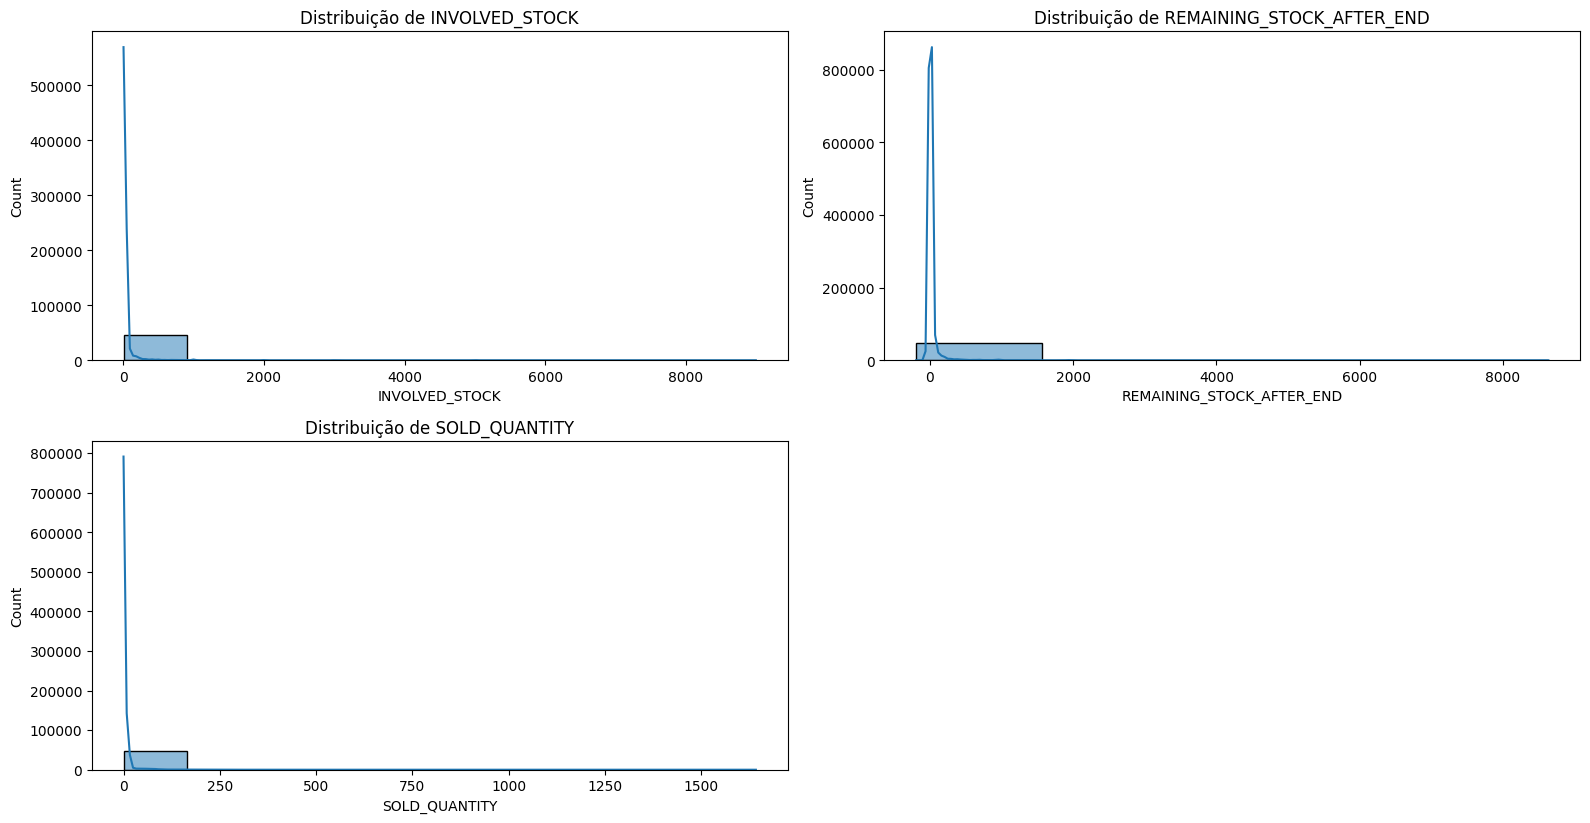

In [ ]:
# Visualização da distribuição de algumas variáveis numéricas
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
sns.histplot(dados['INVOLVED_STOCK'], bins=10, kde=True)
plt.title('Distribuição de INVOLVED_STOCK')

plt.subplot(3, 2, 2)
sns.histplot(dados['REMAINING_STOCK_AFTER_END'], bins=5, kde=True)
plt.title('Distribuição de REMAINING_STOCK_AFTER_END')


plt.subplot(3, 2, 3)
sns.histplot(dados['SOLD_QUANTITY'].dropna(), bins=10, kde=True)
plt.title('Distribuição de SOLD_QUANTITY')


plt.tight_layout()
plt.show()



**No geral**:
- Em todos os gráficos, a maioria dos valores é baixa, perto de zero.
- As linhas suaves (curvas KDE - Estimativa de Densidade Kernel) reforçam essa observação ao mostrarem um pico perto de zero, seguido por uma cauda longa à direita.
- A presença de valores extremos ou outliers pode afetar a média e a variância dos dados e deve ser levada em consideração ao realizar análises ou modelagem com essas variáveis, porém, como parte desse desafio, **não será aprofundado nesse momento, ficará para uma p´roxima oportunidade essa exploração.**

## Visualiação de Outliers

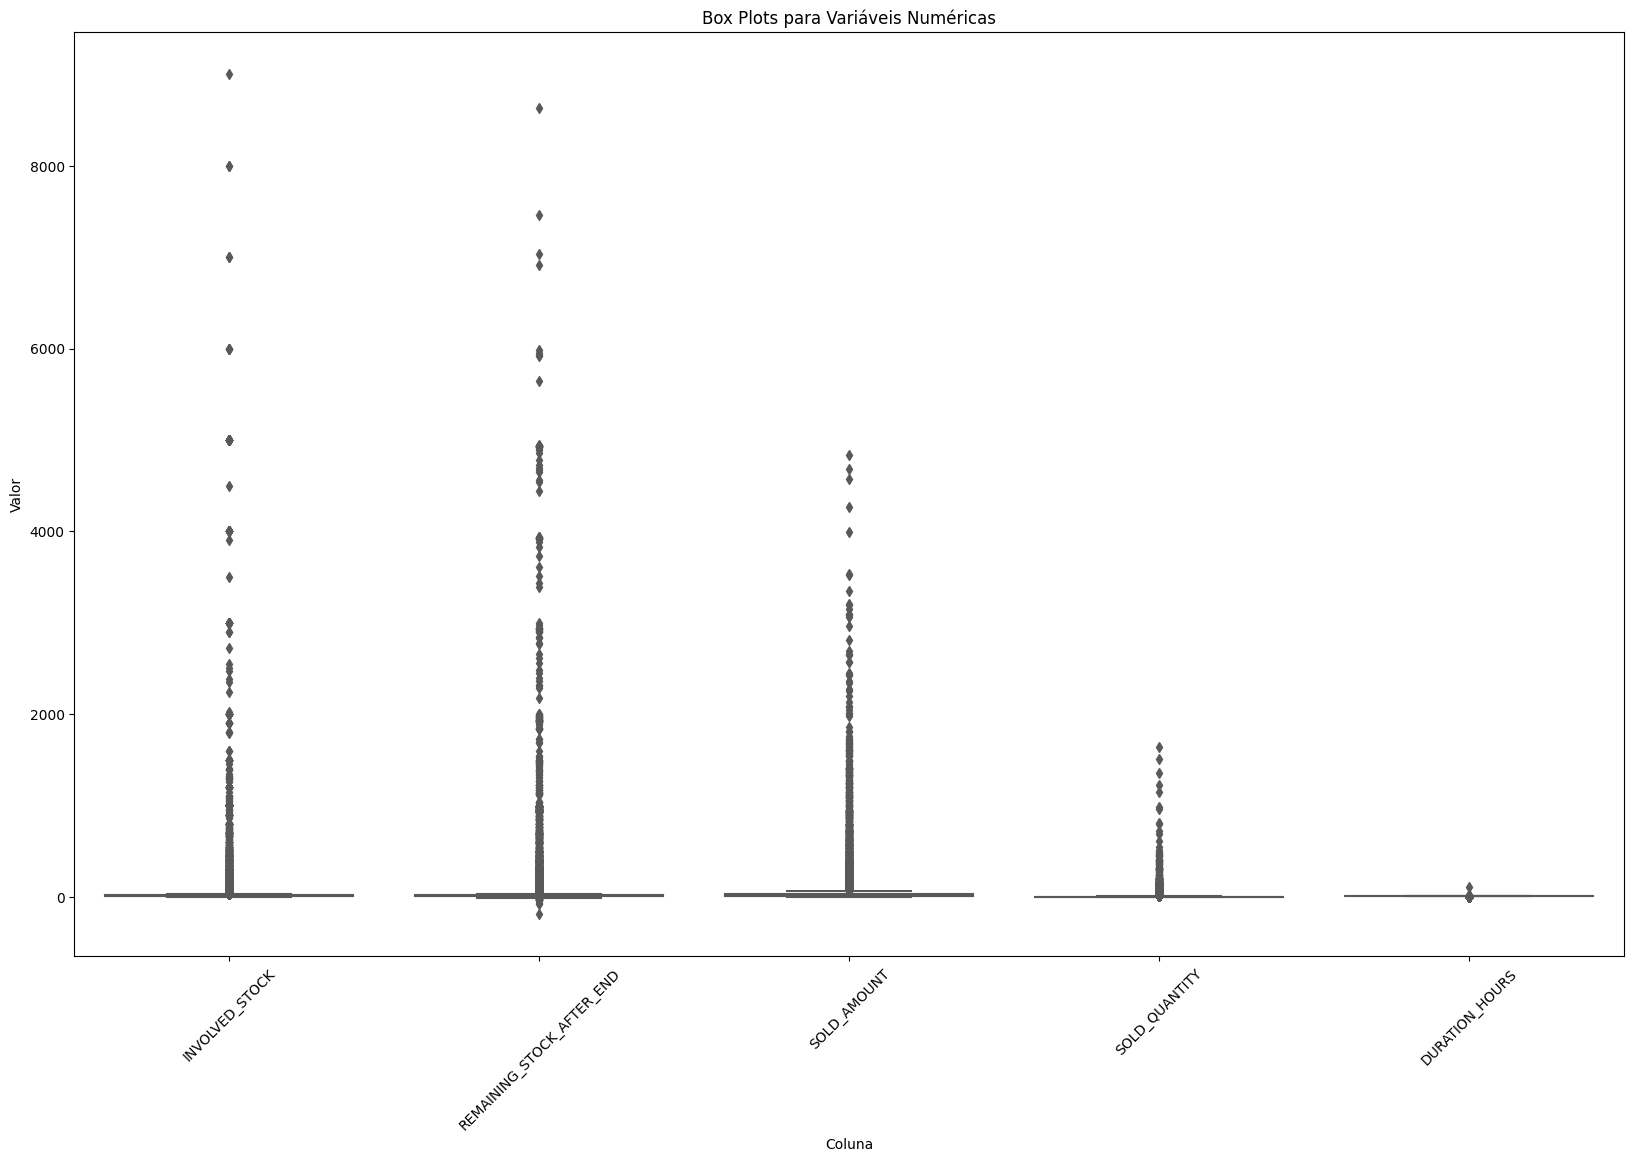

In [ ]:
colunas_numericas = ['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'DURATION_HOURS']

dados_numericos = dados[colunas_numericas]

plt.figure(figsize=(20, 12))

sns.boxplot(data=dados_numericos, orient='v', palette='Set2')

plt.xticks(rotation=45)
plt.xlabel('Coluna')
plt.ylabel('Valor')
plt.title('Box Plots para Variáveis Numéricas')

plt.show()


**Identificação dos outliers**

1. **INVOLVED_STOCK**:
   - A maioria dos valores está concentrada muito perto de zero, conforme indicado pela linha central do retângulo.
   - Há muitos pontos acima da "caixa", indicando outliers. Estes são valores que estão bem acima do que é típico para esta coluna.

2. **REMAINING_STOCK_AFTER_END**:
   - Tbm a maior parte dos valores está próxima de zero.
   - Novamente, há uma série de outliers acima da caixa.

3. **SOLD_AMOUNT**:
   - A situação é semelhante as anteriores, com a maioria dos valores próx de zero e uma série de outliers na parte superior.

4. **SOLD_QUANTITY**:
   - Aqui, a "caixa" é um pouco maior, mostrando que há uma variação um pouco maior nos valores. Ainda assim, a maioria dos dados está perto de zero.
   - Existe uma quantidade significativa de outliers na parte superior.

5. **DURATION_HOURS**:
   - A maioria dos valores está concentrada em um ponto

**Pontos Importantes**:
- Esses gráficos confirmam o que observei anteriormente: a maioria dos valores para essas variáveis está próxima de zero, mas existem alguns valores muito maiores que se destacam como atípicos.

Conforme mencionado anteriormente, eu poderia seguir com o tratamento dos outliers, mas optei por explorar outras abordagens para esse teste.

## Visualização da correlação das variáveis

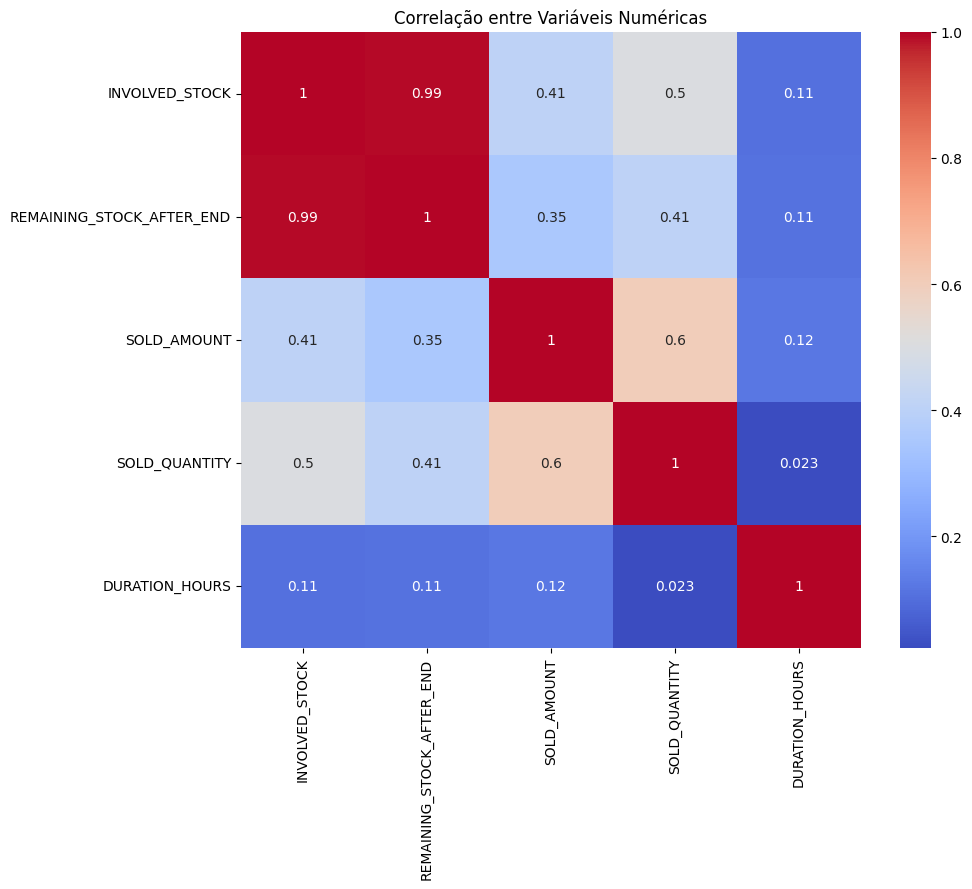

In [ ]:
plt.figure(figsize=(10, 8))
# Visualização de correlações entre variáveis numéricas
sns.heatmap(dados[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_AMOUNT', 'SOLD_QUANTITY', 'DURATION_HOURS']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')

plt.show()


Matriz de correlação entre variáveis numéricas:

1. **Correlação entre "INVOLVED_STOCK" e "REMAINING_STOCK_AFTER_END"**: Uma correlação muito forte de 0,99 sugere que essas duas variáveis estão quase perfeitamente relacionadas linearmente. Quando o valor de "INVOLVED_STOCK" aumenta, o "REMAINING_STOCK_AFTER_END" também tende a aumentar e vice-versa.O que sugere que estoques grandes tem uma ofrta maior na oferta relâmpago.

2. **Correlação entre "SOLD_AMOUNT" e "SOLD_QUANTITY"**: Há uma correlação moderada de 0,6, indicando que, em geral, quando o "SOLD_AMOUNT" aumenta, o "SOLD_QUANTITY" também tende a aumentar, mas não tão fortemente quanto as variáveis mencionadas anteriormente.

3. **Outras Correlações**:
   - "INVOLVED_STOCK" e "SOLD_AMOUNT" têm uma correlação fraca de 0,41.
   - "INVOLVED_STOCK" e "SOLD_QUANTITY" têm uma correlação fraca de 0,5.
   - "REMAINING_STOCK_AFTER_END" e "SOLD_AMOUNT" têm uma correlação fraca de 0,35.
   - "REMAINING_STOCK_AFTER_END" e "SOLD_QUANTITY" têm uma correlação fraca de 0,41.
   - "DURATION_HOURS" com as demais variáveis tem uma correlação fraca, ou seja, normalmente não é um fator determinante nas vendas


In [ ]:
# Calculando a matriz de correlação em relação a duração
correlation_matrix = dados[['SOLD_AMOUNT', 'SOLD_QUANTITY', 'DURATION_HOURS', 'INVOLVED_STOCK']].corr()

correlation_matrix


,SOLD_AMOUNT,SOLD_QUANTITY,DURATION_HOURS,INVOLVED_STOCK
SOLD_AMOUNT,1.000000,0.600387,0.120582,0.405833
SOLD_QUANTITY,0.600387,1.000000,0.023011,0.501035
DURATION_HOURS,0.120582,0.023011,1.000000,0.106365
INVOLVED_STOCK,0.405833,0.501035,0.106365,1.000000


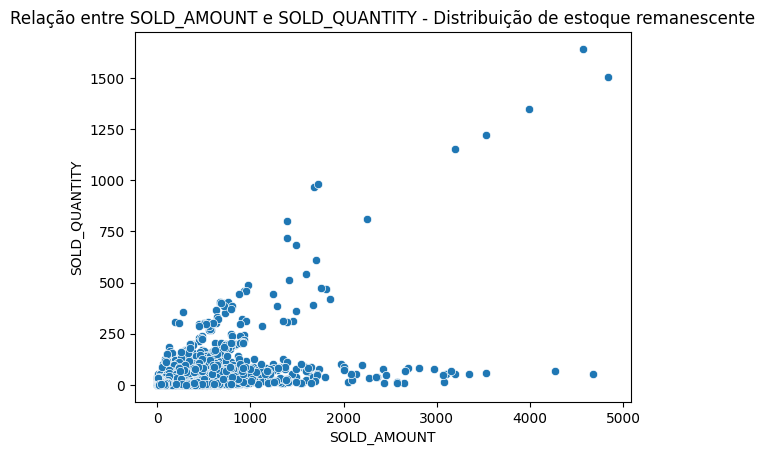

In [ ]:
# Gráfico de dispersão entre SOLD_AMOUNT e SOLD_QUANTITY

# Filtrar os registros onde SOLD_AMOUNT não é nulo
dados_filtrados = dados.dropna(subset=['SOLD_AMOUNT'])

sns.scatterplot(x='SOLD_AMOUNT', y='SOLD_QUANTITY', data=dados_filtrados)
plt.title('Relação entre SOLD_AMOUNT e SOLD_QUANTITY - Distribuição de estoque remanescente')

plt.show()


O gráfico mostra a relação entre "SOLD_AMOUNT" (quantidade vendida em termos de valor) e "SOLD_QUANTITY" (quantidade vendida em termos de unidades)

Essa análise poderia ser melhor explorada caso a coluna SOLD_AMOUNT tivesse com as colunas íntegras, preenchidas de forma fidedigna (visto que quase 50% desses campos não estão preenchidos)

1. **Concentração na Base**:
   - Há uma alta concentração de pontos perto do eixo x, especificamente entre 0 e 1000 em "SOLD_AMOUNT". Isso sugere que, na maioria das vezes, quando se vende uma quantidade menor em termos de valor, também se vende uma quantidade menor em termos de unidades.

2. **Dispersão à Direita**:
   - À medida que "SOLD_AMOUNT" aumenta, começamos a ver uma dispersão maior em "SOLD_QUANTITY". Isso indica que, para valores de venda mais altos, a quantidade de unidades vendidas varia mais.

3. **Pontos Isolados**:
   - Há alguns pontos isolados na parte superior direita, indicando ocasiões onde tanto o valor vendido quanto a quantidade de unidades foram muito altos. Estes podem ser considerados outliers ou eventos atípicos (após exploração abaixo, verificado que trata-se da época da covid).


A maioria das vendas, em termos de valor e quantidade, são pequenas. Mas há momentos em que se vende muito em termos de valor, e a quantidade pode variar bastante. Existem também algumas vendas grandes (tanto em valor quanto em quantidade) que se destacam.



In [ ]:
# Filtrar os registros onde SOLD_QUANTITY é maior que XXXX

itens = 500

itens_vendidos_acima_de_5000 = dados[dados['SOLD_QUANTITY'] > itens]

dados_maiores_vendas = itens_vendidos_acima_de_5000[['DOMAIN_ID',  'INVOLVED_STOCK', 'SOLD_QUANTITY', 'REMAINING_STOCK_AFTER_END']]

dados_maiores_vendas


,DOMAIN_ID,INVOLVED_STOCK,SOLD_QUANTITY,REMAINING_STOCK_AFTER_END
10525,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,8000,540,7460
10534,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,4000,610,3390
11380,MLM-THERMOMETERS,8000,965,7035
11449,MLM-DISPOSABLE_GLOVES,2000,1503,497
11455,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,1500,982,518
12670,MLM-OXIMETERS,3000,686,2314
13737,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,4000,1642,2358
13741,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,810,811,-1
13742,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,7000,1350,5650
22264,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,800,802,-2


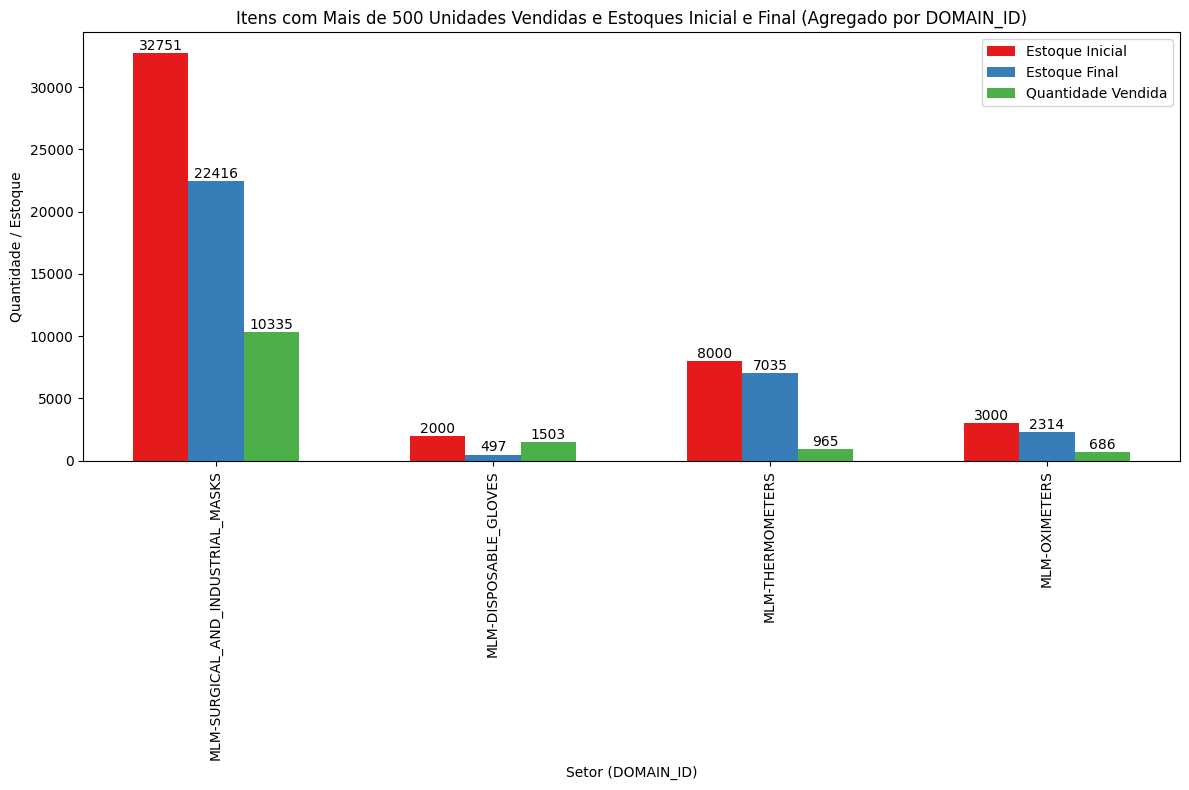

In [ ]:
itens_vendidos_acima_de_500 = dados[dados['SOLD_QUANTITY'] > itens]

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py


# Agrupar por DOMAIN_ID e somar as quantidades vendidas, estoque inicial e estoque final
dados_agrupados = itens_vendidos_acima_de_500.groupby('DOMAIN_ID').agg({
    'SOLD_QUANTITY': 'sum',
    'INVOLVED_STOCK': 'sum',
    'REMAINING_STOCK_AFTER_END': 'sum'
}).reset_index()

dados_agrupados = dados_agrupados.sort_values(by='SOLD_QUANTITY', ascending=False)

plt.figure(figsize=(12, 8))

bar_width = 0.2


positions = range(len(dados_agrupados))

plt.bar(positions, dados_agrupados['INVOLVED_STOCK'], bar_width, color=palette[0], label='Estoque Inicial')

plt.bar([pos + bar_width for pos in positions], dados_agrupados['REMAINING_STOCK_AFTER_END'], bar_width, color=palette[1], label='Estoque Final')
plt.bar([pos + 2 * bar_width for pos in positions], dados_agrupados['SOLD_QUANTITY'], bar_width, color=palette[2], label='Quantidade Vendida')


for i, val in enumerate(dados_agrupados['INVOLVED_STOCK']):
    plt.text(i, val + 10, str(val), va='bottom', ha='center', fontsize=10)

for i, val in enumerate(dados_agrupados['REMAINING_STOCK_AFTER_END']):
    plt.text(i + bar_width, val + 10, str(val), va='bottom', ha='center', fontsize=10)

for i, val in enumerate(dados_agrupados['SOLD_QUANTITY']):
    plt.text(i + 2 * bar_width, val + 10, str(val), va='bottom', ha='center', fontsize=10)

plt.xticks([pos + bar_width for pos in positions], dados_agrupados['DOMAIN_ID'], rotation=90)

plt.xlabel('Setor (DOMAIN_ID)')
plt.ylabel('Quantidade / Estoque')
plt.title(f'Itens com Mais de {itens} Unidades Vendidas e Estoques Inicial e Final (Agregado por DOMAIN_ID)')
plt.legend()

plt.tight_layout()
plt.show()


1. **MLM-SURGICAL_AND_INDUSTRIAL_MASKS**: Esta categoria começou com uma vasta quantidade em estoque (representado em vermelho). A quantidade vendida (verde) foi substancial, mas há ainda uma grande quantidade no estoque (azul). Isso indica que, apesar das boas vendas, há muito mais disponível para venda.

3. **MLM-DISPOSABLE_GLOVES**: Esta categoria teve um ótimo desempenho em termos de vendas, considerando que quase todo o estoque inicial foi vendido, deixando muito pouco em estoque.

2. **MLM-THERMOMETERS**: O estoque inicial era considerável e, apesar de uma boa quantidade ter sido vendida, ainda resta uma quantidade significativa em estoque. Isso sugere que esta categoria não foi tão procurada quanto as máscaras.

4. **MLM-OXIMETERS**: Apesar do menor estoque inicial, a quantidade vendida desta categoria foi razoável. Ainda assim, há um bom montante restante para vendas futuras.

## 3.1 Exploração de Informações de Vendas


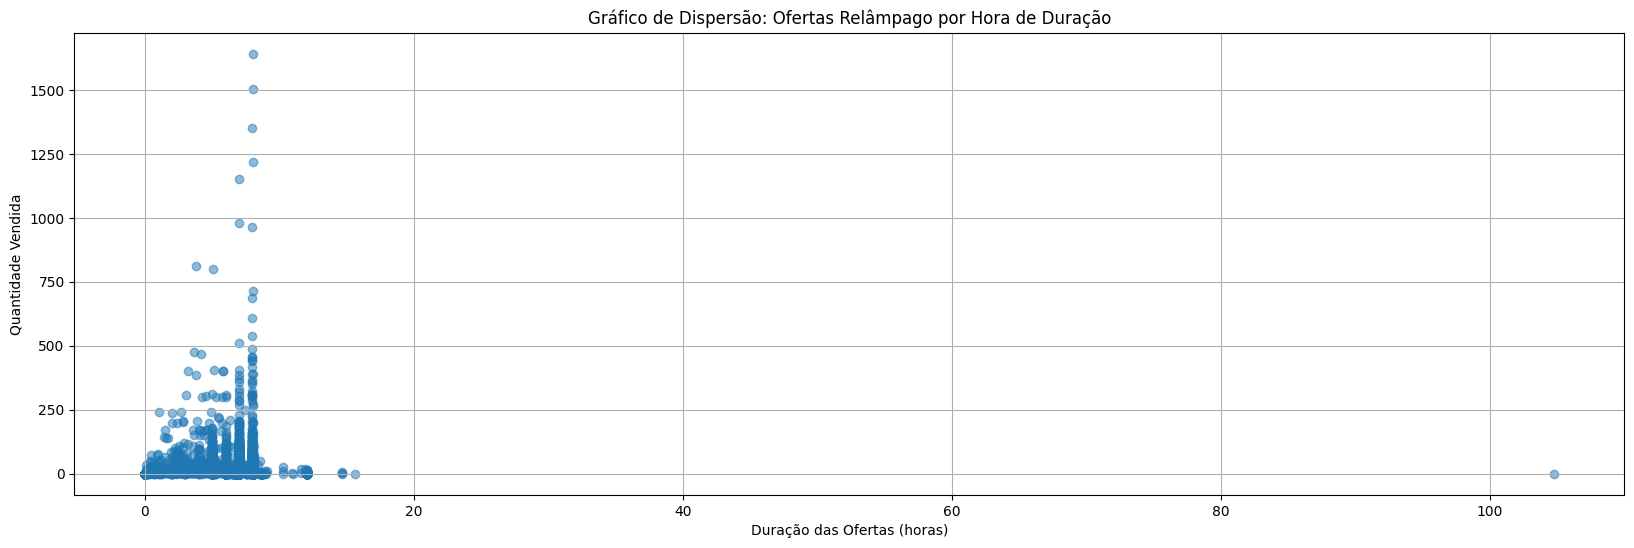

In [ ]:
#Mesmo que só tenha oferta relâmpado, incluindo o filtro p garantir
ofertas_relampago = dados[dados['OFFER_TYPE'] == 'lightning_deal']

plt.figure(figsize=(20, 6))
plt.scatter(ofertas_relampago['DURATION_HOURS'], ofertas_relampago['SOLD_QUANTITY'], alpha=0.5)
plt.xlabel('Duração das Ofertas (horas)')
plt.ylabel('Quantidade Vendida')
plt.title('Gráfico de Dispersão: Ofertas Relâmpago por Hora de Duração')
plt.grid(True)
plt.show()



1. **Concentração Principal**: A grande maioria das ofertas relâmpago tem uma duração entre 0 e 10 horas, com o maior número de vendas ocorrendo aprox as 8h.

2. **Menos Ofertas de Longa Duração**: Conforme a duração das ofertas aumenta, o número de ofertas relâmpago e a quantidade de produtos vendidos diminuem. Isso sugere que ofertas de maior duração podem não ser tão eficazes em promover vendas rápidas como as ofertas mais curtas, provavelmente pelo senso de urgência de compra.

3. **Exceção no Final**: Existe uma oferta com duração próxima a 100 horas, com uma quantidade vendida não muito elevada. Pode não representar tendência.

4. **Variação na Quantidade Vendida**: Ainda que haja uma concentração maior de ofertas na faixa de 0 a 10 horas, a quantidade vendida nessas ofertas varia significativamente, indo de quantidades muito baixas até mais de 1.500 unidades. Isso sugere que outros fatores além da duração influenciam a quantidade vendida, como por exemplo, o tipo de produto, o desconto oferecido, nesse caso em específico, foi observado que é devido a produtos da covid


Histograma da distribuição do tempo de duração das ofertas relâmpago:

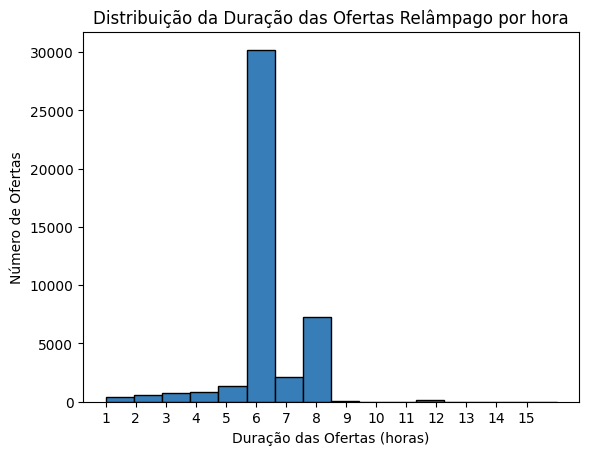

,Intervalo de Horas,Número de Ofertas
0,1-3,1149
1,4-6,7944
2,7-9,9271
3,10-12,9
4,13-15,3
5,16-18,0
6,19-21,0
7,22-24,0
8,>24,1


In [ ]:
# https://matplotlib.org/stable/gallery/statistics/hist.html#histograms

plt.hist(dados['DURATION_HOURS'], bins=16, range=(1, 16), color=palette[1], edgecolor='black')

plt.xticks(range(1, 16))  # Definir os rótulos do eixo x de 1 a 25
plt.xlabel('Duração das Ofertas (horas)')
plt.ylabel('Número de Ofertas')
plt.title('Distribuição da Duração das Ofertas Relâmpago por hora')

# intervalo de horas (a cada 3 horas)
intervalos = [(1, 3), (4, 6), (7, 9), (10, 12), (13, 15), (16, 18), (19, 21), (22, 24), (25, float('inf'))]
contagem_por_intervalo = []
for intervalo in intervalos:
    inicio, fim = intervalo
    contagem = len(dados[(dados['DURATION_HOURS'] >= inicio) & (dados['DURATION_HOURS'] <= fim)])
    contagem_por_intervalo.append(contagem)

# Criar um DataFrame para a tabela
tabela = pd.DataFrame({
    'Intervalo de Horas': ['1-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21', '22-24','>24'],
    'Número de Ofertas': contagem_por_intervalo
})

plt.show()

tabela


1. **Pico Pronunciado em 6 horas**: A maioria esmagadora das ofertas relâmpago tem uma duração de 6 horas. Isso sugere que 6 horas é o período mais comum para essas promoções.

2. **Segundo Pico em 8 horas**: Existe um segundo pico notável em 8 horas.

3. **Durações Alternativas são Raras**: Fora desses dois picos, há muito poucas ofertas relâmpago que duram 1-3 ou mais de 13 horas. Isso sugere que tais durações são menos populares ou menos eficazes para o propósito pretendido.

4. **Ofertas de Duração Longa São Excepcionais**: Apesar de haver algumas ofertas que duram 12 horas, quase não vemos ofertas que duram mais do que isso. Promoções que se estendem por períodos muito longos podem não ser percebidas como "relâmpago" e, portanto, podem não criar o mesmo sentido de urgência

5. **Outlier**: tem 1 oferta que passou de 24h, podendo ser considerado como possível erro da promoção.



In [ ]:
dados_ordenados = dados.sort_values(by='DURATION_HOURS', ascending=False)
top_10_duracoes = dados_ordenados.head(10)
top_10_duracoes


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,MONTH,DAY_OF_WEEK_START,DAY_OF_WEEK_FINISH,DURATION_HOURS,Fast_Selling,HOUR_OF_DAY,FAIXA_DE_HORA
42018,2021-06-05,2021-06-05 13:00:00+00:00,2021-06-09 21:45:09+00:00,lightning_deal,5,5,NaN,0,NA,none,APPAREL ACCESORIES,APP & SPORTS,MLM-SLEEPING_MASKS,6,Saturday,Wednesday,104.752500,False,13,12:00 - 15:59
28642,2021-07-21,2021-07-21 18:00:00+00:00,2021-07-22 09:37:09+00:00,lightning_deal,100,100,NaN,0,A,free_shipping,MOBILE,CE,MLM-TABLETS,7,Wednesday,Thursday,15.619167,False,18,16:00 - 19:59
28556,2021-07-21,2021-07-21 19:00:00+00:00,2021-07-22 09:40:07+00:00,lightning_deal,10,9,4.88,1,A,free_shipping,PERSONAL HYGIENE,CPG,MLM-HAIR_SHAMPOOS_AND_CONDITIONERS,7,Wednesday,Thursday,14.668611,False,19,16:00 - 19:59
28540,2021-07-21,2021-07-21 19:00:00+00:00,2021-07-22 09:37:47+00:00,lightning_deal,15,9,25.92,6,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-ANTIBACTERIAL_GELS,7,Wednesday,Thursday,14.629722,False,19,16:00 - 19:59
28519,2021-07-21,2021-07-21 19:00:00+00:00,2021-07-22 09:37:11+00:00,lightning_deal,5,5,NaN,0,A,free_shipping,ELECTRONICS,CE,MLM-AIR_PURIFIERS,7,Wednesday,Thursday,14.619722,False,19,16:00 - 19:59
39210,2021-07-29,2021-07-29 07:00:00+00:00,2021-07-29 19:02:46+00:00,lightning_deal,5,3,4.80,2,NA,none,APPAREL ACCESORIES,APP & SPORTS,MLM-WATCH_BANDS,7,Thursday,Thursday,12.046111,False,7,04:00 - 07:59
39395,2021-07-29,2021-07-29 07:00:00+00:00,2021-07-29 19:02:45+00:00,lightning_deal,15,13,2.61,2,NA,none,APPAREL ACCESORIES,APP & SPORTS,MLM-BODY_SHAPERS,7,Thursday,Thursday,12.045833,False,7,04:00 - 07:59
38336,2021-07-29,2021-07-29 07:00:00+00:00,2021-07-29 19:02:44+00:00,lightning_deal,15,7,89.89,8,NA,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,7,Thursday,Thursday,12.045556,False,7,04:00 - 07:59
39603,2021-07-29,2021-07-29 07:00:00+00:00,2021-07-29 19:02:41+00:00,lightning_deal,5,3,17.84,2,NA,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS,7,Thursday,Thursday,12.044722,False,7,04:00 - 07:59
39512,2021-07-29,2021-07-29 07:00:00+00:00,2021-07-29 19:02:39+00:00,lightning_deal,5,4,52.49,1,NA,free_shipping,ELECTRONICS,CE,MLM-COFFEE_MAKERS,7,Thursday,Thursday,12.044167,False,7,04:00 - 07:59



Melhor horário de vendas por item



1.   List item

1.   List item

In [ ]:

# Filtrar os registros onde SOLD_QUANTITY é menor que 1000
dados_filtrados = dados[dados['SOLD_QUANTITY'] > 0]

# Agrupar por VERTICAL, HOUR_OF_DAY e calcular a média das vendas
media_vendas_por_hora = dados_filtrados.groupby(['DOM_DOMAIN_AGG1', 'HOUR_OF_DAY'])['SOLD_QUANTITY'].mean().reset_index()

# Para cada VERTICAL, encontrar o horário com a média mais alta de vendas
melhor_horario_por_vertical = media_vendas_por_hora.groupby('DOM_DOMAIN_AGG1').apply(lambda x: x.loc[x['SOLD_QUANTITY'].idxmax()])

# Ordenar os resultados por hora
melhor_horario_por_vertical = melhor_horario_por_vertical.sort_values(by='HOUR_OF_DAY')

# Exibir a tabela com os melhores horários por VERTICAL
melhor_horario_por_vertical



,DOM_DOMAIN_AGG1,HOUR_OF_DAY,SOLD_QUANTITY
DOM_DOMAIN_AGG1,,,
STATIONARY,STATIONARY,8,19.000000
BEAUTY EQUIPMENT,BEAUTY EQUIPMENT,9,1503.000000
INDUSTRY,INDUSTRY,10,68.500000
BABY,BABY,11,6.187500
SPORTS,SPORTS,12,16.208333
PERSONAL CARE,PERSONAL CARE,12,7.400000
CLEANING,CLEANING,12,12.250000
ACC TOOLS,ACC TOOLS,13,3.285714
PET PRODUCTS,PET PRODUCTS,13,3.771429


## 3.2 Exploração de Informações Temporais


### 3.2.1. Duração das Ofertas Relâmpago

Vou considerar como uma oferta rápida, uma oferta com venda até 1h

In [ ]:
limite_tempo_rapido = 2  # em horas

dados['Fast_Selling'] = dados['DURATION_HOURS'] < limite_tempo_rapido


Número de ofertas vendidas em tempo recorde: 3187


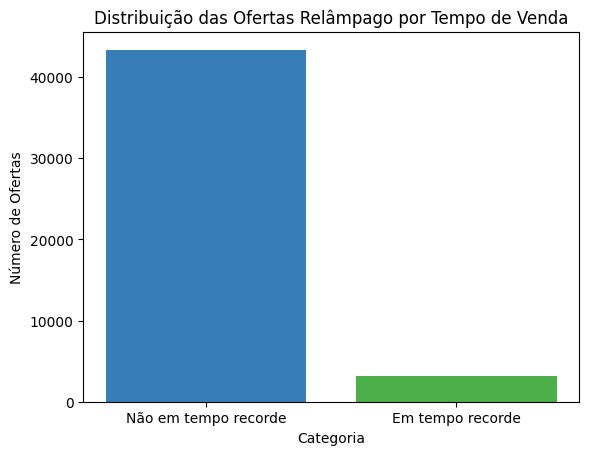

In [ ]:
# Contar o número de ofertas vendidas em tempo recorde
ofertas_tempo_recorde = dados[dados['Fast_Selling'] == True]
numero_ofertas_tempo_recorde = len(ofertas_tempo_recorde)

print(f"Número de ofertas vendidas em tempo recorde: {numero_ofertas_tempo_recorde}")

plt.bar(['Não em tempo recorde', 'Em tempo recorde'], [len(dados) - numero_ofertas_tempo_recorde, numero_ofertas_tempo_recorde], color=[palette[1], palette[2]])

plt.xlabel('Categoria')
plt.ylabel('Número de Ofertas')
plt.title('Distribuição das Ofertas Relâmpago por Tempo de Venda')

plt.show()


1. **Predominância de Ofertas não Vendidas em Tempo Recorde**: A maioria das ofertas não é vendida em tempo recorde (considerando o limite definido de 2h horas). Isso é evidente pela grande barra azul, que representa uma contagem muito maior do que a barra verde.



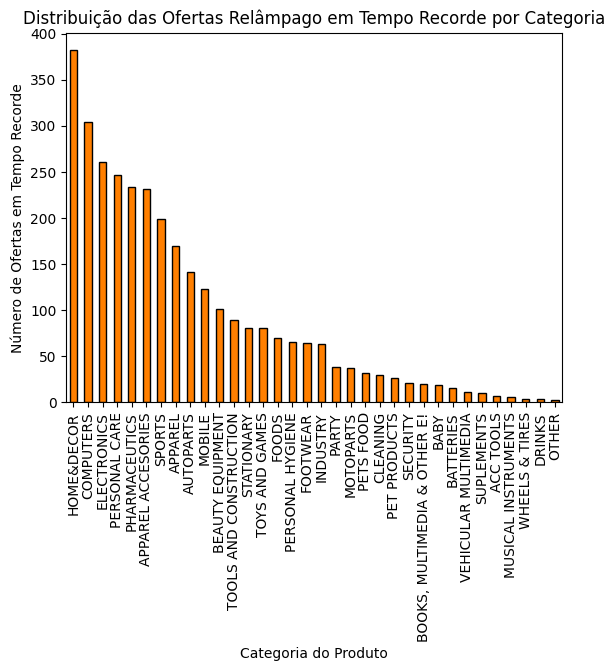

In [ ]:
# Criar visualizção com a contagem de ofertas em tempo recorde por categoria

contagem_por_categoria = ofertas_tempo_recorde['DOM_DOMAIN_AGG1'].value_counts()

contagem_por_categoria.plot(kind='bar', color=palette[4], edgecolor='black')

plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Ofertas em Tempo Recorde')
plt.title('Distribuição das Ofertas Relâmpago em Tempo Recorde por Categoria')

plt.show()


1. **Diferenças Pronunciadas entre Categorias**: Algumas categorias, como "HOME DECOR", "ELECTRONICS", e "PERSONAL CARE", têm um número significativamente maior de ofertas vendidas em tempo recorde quando comparadas a outras categorias.

2. **Categorias com Menos Vendas Rápidas**: No final do gráfico, vemos categorias como "MUSICAL INSTRUMENTS", "VEHICULAR WHEELS", e "GLASSES" que têm muito poucas ofertas vendidas em tempo recorde.

- **Categorias Populares**: As categorias no início do gráfico, com barras mais altas, representam produtos populares ou altamente desejados, que provavelmente possuem uma alta demanda. Isso pode ser devido à natureza essencial dos produtos ou a promoções atraentes que incentivam os consumidores a comprar rapidamente.

- **Categorias Menos Populares**: As categorias com menor número de ofertas vendidas em tempo recorde podem indicar produtos menos populares ou menos desejados. Pode também indicar que as promoções para essas categorias não foram tão atraentes quanto as de outras categorias.


### 3.3.2. Exploração das Ofertas Relâmpago Vendidas em Tempo Recorde

In [ ]:
# Comparar estatísticas descritivas entre ofertas vendidas em tempo recorde e as demais
estatisticas_tempo_recorde = ofertas_tempo_recorde[['SOLD_AMOUNT', 'SOLD_QUANTITY']].describe()
estatisticas_outras_ofertas = dados[dados['Fast_Selling'] == False][['SOLD_AMOUNT', 'SOLD_QUANTITY']].describe()

# Exibir estatísticas descritivas
print("Estatísticas para ofertas vendidas em tempo recorde:")
estatisticas_tempo_recorde


Estatísticas para ofertas vendidas em tempo recorde:


,SOLD_AMOUNT,SOLD_QUANTITY
count,672.000000,3187.000000
mean,44.379003,2.419831
std,116.304793,8.936167
min,0.990000,0.000000
25%,10.912500,0.000000
50%,18.815000,0.000000
75%,38.825000,0.000000
max,1406.420000,241.000000


In [ ]:
print("\nEstatísticas para outras ofertas:")
estatisticas_outras_ofertas



Estatísticas para outras ofertas:


,SOLD_AMOUNT,SOLD_QUANTITY
count,23876.000000,43362.000000
mean,51.368762,4.798095
std,176.693031,25.525519
min,0.280000,0.000000
25%,5.660000,0.000000
50%,12.210000,1.000000
75%,30.610000,3.000000
max,4836.570000,1642.000000


Criação de gráficos de boxplot para comparar as distribuições

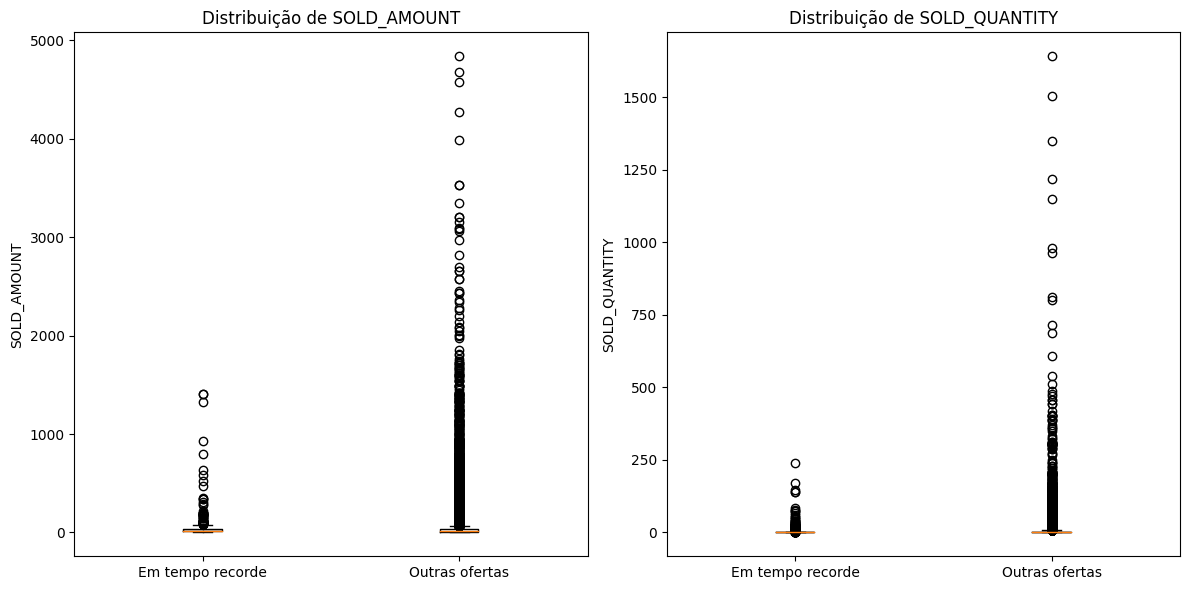

In [ ]:
plt.figure(figsize=(12, 6))

# Boxplot para SOLD_AMOUNT
plt.subplot(1, 2, 1)
plt.boxplot([ofertas_tempo_recorde['SOLD_AMOUNT'].dropna(), dados[dados['Fast_Selling'] == False]['SOLD_AMOUNT'].dropna()], labels=['Em tempo recorde', 'Outras ofertas'])
plt.title('Distribuição de SOLD_AMOUNT')
plt.ylabel('SOLD_AMOUNT')

# Boxplot para SOLD_QUANTITY
plt.subplot(1, 2, 2)
plt.boxplot([ofertas_tempo_recorde['SOLD_QUANTITY'].dropna(), dados[dados['Fast_Selling'] == False]['SOLD_QUANTITY'].dropna()], labels=['Em tempo recorde', 'Outras ofertas'])
plt.title('Distribuição de SOLD_QUANTITY')
plt.ylabel('SOLD_QUANTITY')

plt.tight_layout()
plt.show()


Os gráficos exibidos representam a distribuição de "SOLD_AMOUNT" (quantidade vendida em valor monetário) e "SOLD_QUANTITY" (quantidade de produtos vendidos) para duas categorias de ofertas: aquelas que foram vendidas em tempo recorde e aquelas que não foram.

**Análise do Gráfico da Distribuição de SOLD_AMOUNT**:
1. **Em tempo recorde**: A grande maioria das ofertas vendidas em tempo recorde têm um valor monetário que se concentra na parte inferior, com alguns valores atípicos que se destacam.
2. **Outras ofertas**: As ofertas que não foram vendidas em tempo recorde mostram uma distribuição semelhante. A maior concentração também está na parte inferior, com alguns valores atípicos. No entanto, o número de ofertas com valores mais elevados é mais significativo comparado à categoria "em tempo recorde".

**Análise do Gráfico da Distribuição de SOLD_QUANTITY**:
1. **Em tempo recorde**: Há uma concentração de ofertas vendidas em quantidade na parte inferior do gráfico, com alguns valores atípicos.
2. **Outras ofertas**: Semelhante ao gráfico de SOLD_AMOUNT, as ofertas que não foram vendidas em tempo recorde têm uma concentração maior na parte inferior, com alguns valores atípicos, e o número de ofertas com quantidades maiores é mais significativo em comparação com a categoria "em tempo recorde".


- As ofertas que foram vendidas em tempo recorde tendem a ter uma quantidade vendida (tanto em valor quanto em número de produtos) mais baixa em comparação com as ofertas que não foram vendidas rapidamente.
- Existem alguns valores atípicos em ambas as categorias, o que indica que, ocasionalmente, ofertas são vendidas em grandes quantidades ou valores, independentemente de serem vendidas rapidamente ou não.
- A existência de mais ofertas com quantidades maiores na categoria "Outras ofertas" sugere que a duração da oferta pode permitir uma venda mais prolongada, acumulando maiores quantidades vendidas ao longo do tempo.
- Embora as ofertas vendidas em tempo recorde sejam vendidas rapidamente, elas não necessariamente representam as ofertas com as maiores quantidades ou valores vendidos

### Análise de ofertas relâmpago com 100% da venda

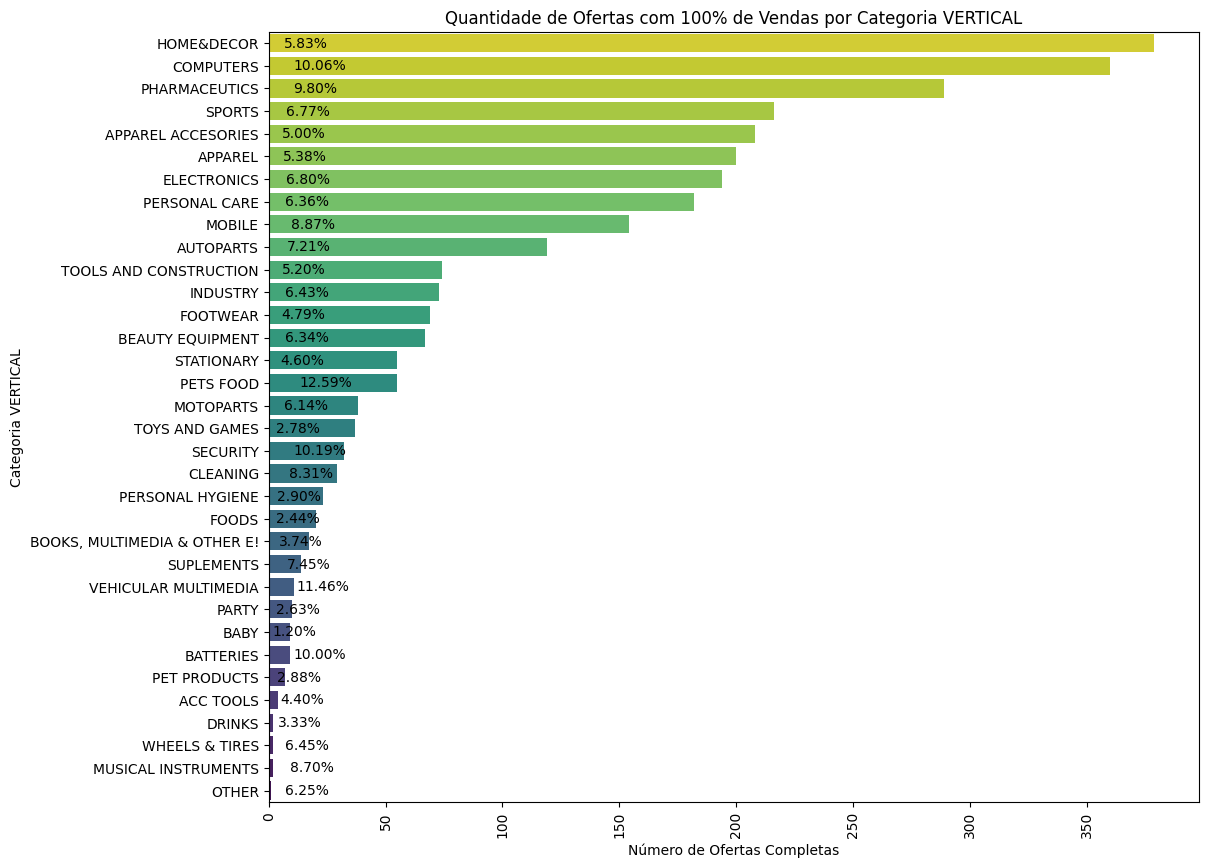

In [ ]:
# Filtrar os registros onde INVOLVED_STOCK é igual a SOLD_QUANTITY
ofertas_completas = dados[dados['INVOLVED_STOCK'] == dados['SOLD_QUANTITY']]

# Contar a quantidade de ofertas completas por VERTICAL
contagem_por_vertical = ofertas_completas['DOM_DOMAIN_AGG1'].value_counts()

# Contar a quantidade total de ofertas por VERTICAL
contagem_total_por_vertical = dados['DOM_DOMAIN_AGG1'].value_counts()

# Calcular a porcentagem de ofertas completas em relação ao total
porcentagem_completas = (contagem_por_vertical / contagem_total_por_vertical) * 100
porcentagem_completas = porcentagem_completas.loc[contagem_por_vertical.index]

plt.figure(figsize=(12, 10))
sns.barplot(x=contagem_por_vertical.values, y=contagem_por_vertical.index, palette='viridis_r')

plt.xlabel('Número de Ofertas Completas')
plt.ylabel('Categoria VERTICAL')
plt.title('Quantidade de Ofertas com 100% de Vendas por Categoria VERTICAL')
plt.xticks(rotation=90)

for i, v in enumerate(porcentagem_completas.values):
    plt.text(v + 0.5, i, f'{v:.2f}%', va='center')

plt.show()



ofertas que tiveram 100% de suas quantidades vendidas para cada categoria vertical.

1. **HOME&DECOR**: Esta categoria lidera a lista com mais de 300 ofertas tendo todas as suas quantidades vendidas, com uma taxa de vendas completas de 5,83%.

2. **COMPUTERS**: Seguindo de perto, a categoria "COMPUTERS" tem uma taxa de 10% de ofertas completamente vendidas, o que é significativamente mais alto, proporcionalmente, do que o líder em números absolutos.

3. **PHARMACEUTICS**: Esta categoria, apesar de estar em terceiro lugar em termos de quantidade, tem uma taxa de 9,80% de suas ofertas sendo vendidas completamente.

4. A categoria **BABY**, embora tenha uma quantidade menor de ofertas totalmente vendidas em comparação com as categorias acima, ainda possui uma taxa de venda completa de 1,02%.

5. Além disso, categorias como **BATTERIES** e **SECURITY** apresentam taxas de 10,00% e 10,19%, respectivamente, o que indica uma demanda significativa ou uma boa estratégia de marketing para essas categorias.


- Mesmo que uma categoria tenha muitas ofertas totalmente vendidas, sua taxa proporcional pode não ser tão alta. Por exemplo, enquanto "HOME&DECOR" lidera em termos de quantidade, sua taxa proporcional é de apenas 5,83%.

- Algumas categorias têm uma quantidade menor de ofertas totalmente vendidas, mas uma taxa proporcionalmente mais alta. Isso pode indicar que essas categorias têm uma demanda mais consistente ou que as ofertas são geralmente mais atrativas para os clientes.

- Para estratégias futuras, os ML pode investigar por que certas categorias têm taxas proporcionalmente mais altas e tentar aplicar esses aprendizados a categorias que não estão se saindo tão bem.

In [ ]:
import pandas as pd

# qtd ofertas completas por VERTICAL
contagem_por_vertical = ofertas_completas['DOM_DOMAIN_AGG1'].value_counts().reset_index()
contagem_por_vertical.columns = ['Categoria VERTICAL', 'Qtd de Ofertas 100% Fechadas']

# qtd total de ofertas por VERTICAL
contagem_total_por_vertical = dados['DOM_DOMAIN_AGG1'].value_counts().reset_index()
contagem_total_por_vertical.columns = ['Categoria VERTICAL', 'Qtd de Ofertas Total']

porcentagem_completas = (contagem_por_vertical['Qtd de Ofertas 100% Fechadas'] / contagem_total_por_vertical['Qtd de Ofertas Total']) * 100
porcentagem_completas = porcentagem_completas.loc[contagem_por_vertical.index]

contagem_por_vertical['% do Total'] = porcentagem_completas

contagem_por_vertical = contagem_por_vertical.sort_values(by='% do Total', ascending=False)
contagem_por_vertical


,Categoria VERTICAL,Qtd de Ofertas 100% Fechadas,% do Total
27,BATTERIES,9,9.375000
8,MOBILE,154,8.865861
32,MUSICAL INSTRUMENTS,2,8.695652
1,COMPUTERS,360,8.645533
2,PHARMACEUTICS,289,7.770906
28,PET PRODUCTS,7,7.692308
9,AUTOPARTS,119,7.212121
6,ELECTRONICS,194,6.780846
5,APPAREL,200,6.779661
4,APPAREL ACCESORIES,208,6.516291


### 3.3.3: Análise Temporal e Padrões Semanais

Explorar padrões temporais nas ofertas relâmpago. Analisar os padrões semanais.

Visualização de total de ofertas relâmpago para cada dia da semana com inclusão de Regressão linear para entender a tendência ao longo do tempo

<ipython-input-393-647e0aa70116>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas['DAY_OF_WEEK_START'] = pd.Categorical(dados_vendas['DAY_OF_WEEK_START'], categories=ordem_dias_semana, ordered=True)


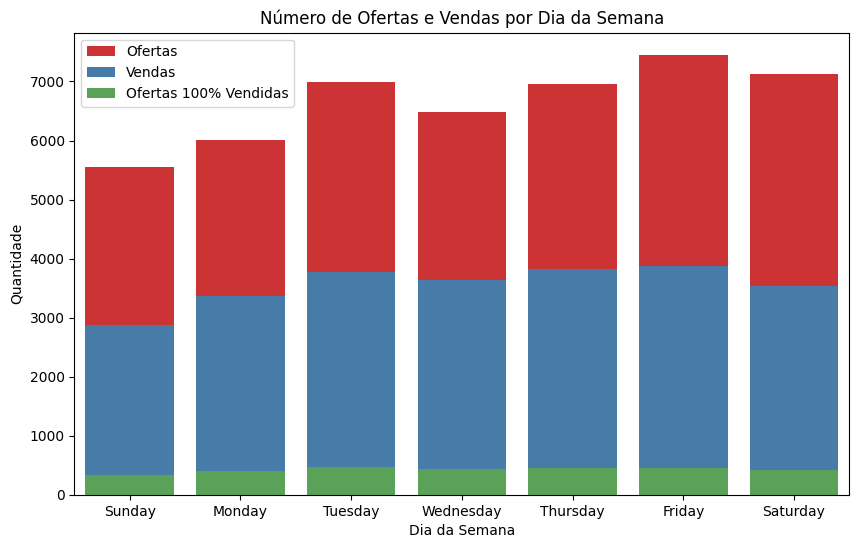

,Dia da Semana,Número de Ofertas,Número de Vendas,Número de Ofertas 100% Vendidas
0,Sunday,5545,2878,339
1,Monday,6013,3358,395
2,Tuesday,6989,3772,474
3,Wednesday,6475,3644,441
4,Thursday,6952,3819,452
5,Friday,7453,3866,446
6,Saturday,7122,3532,414


In [ ]:
dados_vendas = dados[dados['SOLD_QUANTITY'] > 0]

ordem_dias_semana = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Definir a coluna DAY_OF_WEEK_START como uma categoria com a ordem personalizada
dados['DAY_OF_WEEK_START'] = pd.Categorical(dados['DAY_OF_WEEK_START'], categories=ordem_dias_semana, ordered=True)
dados_vendas['DAY_OF_WEEK_START'] = pd.Categorical(dados_vendas['DAY_OF_WEEK_START'], categories=ordem_dias_semana, ordered=True)

# Agrupar por DAY_OF_WEEK_START e contar o número de ofertas e vendas em cada dia da semana
contagem_ofertas = dados['DAY_OF_WEEK_START'].value_counts().sort_index()
contagem_vendas = dados_vendas['DAY_OF_WEEK_START'].value_counts().sort_index()

# Calcular o número de ofertas 100% vendidas por dia da semana
ofertas_completas = dados[dados['INVOLVED_STOCK'] == dados['SOLD_QUANTITY']]
contagem_ofertas_completas = ofertas_completas['DAY_OF_WEEK_START'].value_counts().sort_index()

# DF com os dados
df = pd.DataFrame({
    'Dia da Semana': contagem_ofertas.index,
    'Número de Ofertas': contagem_ofertas.values,
    'Número de Vendas': contagem_vendas.values,
    'Número de Ofertas 100% Vendidas': contagem_ofertas_completas.values
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Dia da Semana', y='Número de Ofertas', data=df, color=palette[0], label='Ofertas')
sns.barplot(x='Dia da Semana', y='Número de Vendas', data=df, color=palette[1], label='Vendas')
sns.barplot(x='Dia da Semana', y='Número de Ofertas 100% Vendidas', data=df, color=palette[2], label='Ofertas 100% Vendidas')

plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade')
plt.title('Número de Ofertas e Vendas por Dia da Semana')
plt.legend()

plt.show()

df


1. **Sexta-feira**: Este é o dia com o maior número de ofertas disponíveis e, consequentemente, apresenta o maior número de vendas. Isso indica que sexta-feira é um dia estratégico para lançar ofertas relâmpago e também um dia em que os consumidores estão mais inclinados a comprar.

2. **Equilíbrio entre Ofertas e Vendas**: Para a maioria dos dias da semana, vemos que o número de vendas acompanha bem de perto o número de ofertas. No entanto, em alguns dias, como domingo, há uma diferença visível entre o número de ofertas e vendas. Mesmo que o número de ofertas seja significativo, as vendas são relativamente menores.

3. **Meio da Semana**: Terça, quarta e quinta-feira mostram um equilíbrio muito consistente entre ofertas e vendas, indicando que a demanda dos consumidores está bem alinhada com a oferta de produtos.

4. **Final de Semana**: Enquanto o sábado tem uma boa correlação entre ofertas e vendas, o domingo mostra uma diferença maior. Mesmo que o número de ofertas no domingo seja comparável ao de outros dias, as vendas são visivelmente mais baixas.

- Independente da quantidade de ofertas disponível, o número de ofertas 100% vendidas é sempre em média de 423 vendas por dia, sendo Terça-feira o dia com maior destaque

- Sexta-feira é o dia mais importante para as ofertas relâmpago em termos de quantidade e vendas. Estratégias de marketing ou promoções adicionais podem ser implementadas neste dia para maximizar o retorno.

- O domingo pode ser um dia em que, embora haja um número significativo de ofertas, as vendas não estão à altura. Isso pode indicar uma oportunidade de reavaliar as ofertas do domingo ou implementar estratégias específicas para aumentar as vendas nesse dia.

In [ ]:
# Agrupando por dia da semana e calculando as estatísticas descritivas
estatisticas_por_dia = dados.groupby('DAY_OF_WEEK_START')['SOLD_AMOUNT'].describe()

estatisticas_por_dia

,count,mean,std,min,25%,50%,75%,max
DAY_OF_WEEK_START,,,,,,,,
Friday,3822.0,46.484158,168.719358,0.54,5.6025,11.895,29.4900,4678.68
Monday,3306.0,59.470681,217.378111,0.28,5.8925,12.960,33.0100,4570.31
Saturday,3489.0,44.522035,148.536974,0.30,5.2800,11.330,27.4600,3065.15
Sunday,2847.0,38.476066,107.893500,0.43,5.5800,11.830,28.6050,1720.20
Thursday,3782.0,51.378033,152.727917,0.61,5.8425,12.525,30.9475,2657.99
Tuesday,3707.0,58.916720,201.239904,0.28,6.0600,13.430,34.4700,4836.57
Wednesday,3595.0,56.866754,197.314509,0.45,6.0300,12.960,32.5450,3530.39


###3.3.4 Análise do Horário do Dia

In [ ]:
# incluir coluna HOUR_OF_DAY
dados['HOUR_OF_DAY'] = dados['OFFER_START_DTTM'].dt.hour

dados[['OFFER_START_DTTM', 'HOUR_OF_DAY']].head()

,OFFER_START_DTTM,HOUR_OF_DAY
0,2021-06-22 16:00:00+00:00,16
1,2021-06-22 13:00:00+00:00,13
2,2021-06-22 07:00:00+00:00,7
3,2021-06-22 19:00:00+00:00,19
4,2021-06-22 13:00:00+00:00,13


In [ ]:
# Agrupando por hora do dia e calculando as estatísticas descritivas
estatisticas_por_hora = dados.groupby('HOUR_OF_DAY')['SOLD_AMOUNT'].describe()

estatisticas_por_hora


,count,mean,std,min,25%,50%,75%,max
HOUR_OF_DAY,,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22.0,248.401818,227.328770,11.04,70.5750,170.820,378.9250,885.55
2,4.0,166.955000,58.404001,119.27,119.2700,155.030,202.7150,238.49
3,2.0,779.045000,663.244948,310.06,544.5525,779.045,1013.5375,1248.03
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,10.140000,NaN,10.14,10.1400,10.140,10.1400,10.14
7,5507.0,18.199976,41.709621,0.32,4.6500,9.080,19.5000,1403.06
8,12.0,11.250000,7.854997,3.52,5.8675,8.580,15.4300,29.95


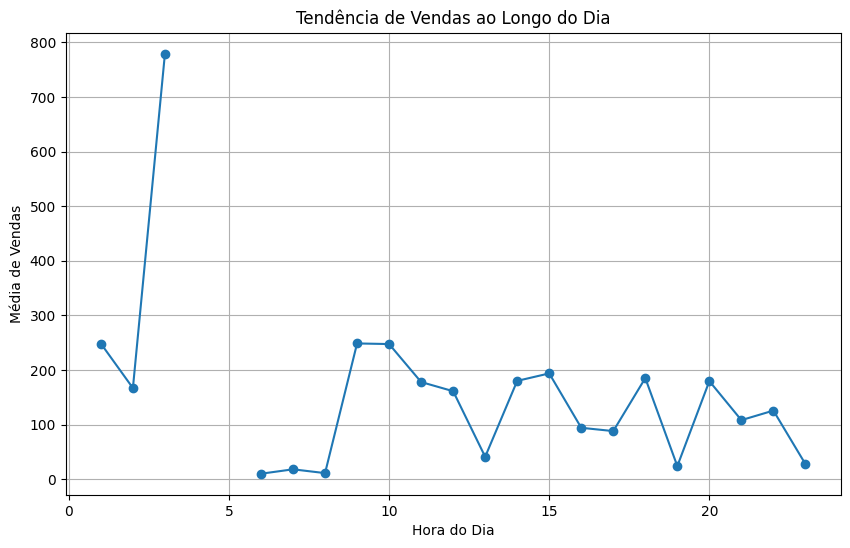

In [ ]:
# Dados para o gráfico
hours = dados.groupby('HOUR_OF_DAY')['SOLD_AMOUNT'].mean().index
mean_sales = dados.groupby('HOUR_OF_DAY')['SOLD_AMOUNT'].mean()


plt.figure(figsize=(10, 6))
plt.plot(hours, mean_sales, marker='o', linestyle='-')


plt.xlabel('Hora do Dia')
plt.ylabel('Média de Vendas')
plt.title('Tendência de Vendas ao Longo do Dia')

plt.grid(True)
plt.show()


1. **Pico Inicial**: No início do dia, especificamente por volta das 3 horas, há um pico significativo nas vendas médias. Isso pode ser devido a promoções de ofertas relâmpago que são lançadas na primeira hora ou alguma outra estratégia de marketing direcionada, como por exemplo as máscaras de proteção.

2. **Manhã**: O período das 09 as 11h da manhã parece ter um alto nível de engajamento nas vendas.

3. **Meio-Dia até a Tarde**: A partir das 11h até por volta das 13 horas, há um queda gradual nas vendas médias. Esse período representa horário de almoço durante o horário de trabalho.

4. **Final da Tarde e Noite**: As vendas começam a diminuir gradualmente no final da tarde e continuam em declínio durante a noite.

5. **Madrugada**: O horário da 00h tem um bom horário de média de vendas (desconsiderando o outlier)

- **Promoções de Madrugada**: O pico inicial pode ser uma oportunidade de marketing, onde ofertas específicas podem ser lançadas para atrair clientes que compram em horários atípicos.

- **Maximizar a Tarde**: A tarde parece ser o período mais lucrativo em termos de vendas médias. Estratégias de marketing e promoções podem ser direcionadas para esse período para maximizar as vendas.

- **Reavaliar a Noite**: O declínio nas vendas à noite pode ser uma oportunidade de reavaliar as ofertas e estratégias para esse período. Por exemplo, ofertas noturnas específicas ou promoções limitadas podem ser introduzidas para atrair clientes.

 ### 3.3.5: Análise Adicional ofertas longas


ofertas relâmpago que têm uma duração muito curta e aquelas que têm uma duração mais longa.

In [ ]:
# Definir ofertas rápidas como aquelas com duração inferior a 1 hora
ofertas_rapidas = dados[dados['DURATION_HOURS'] < 1]

# Definir ofertas longas como aquelas com duração superior a 5 horas
ofertas_longas = dados[dados['DURATION_HOURS'] > 5]

print("Estatísticas para ofertas rápidas:")
print(ofertas_rapidas[['SOLD_AMOUNT', 'SOLD_QUANTITY']].describe())

print("\nEstatísticas para ofertas longas:")
print(ofertas_longas[['SOLD_AMOUNT', 'SOLD_QUANTITY']].describe())


Estatísticas para ofertas rápidas:
       SOLD_AMOUNT  SOLD_QUANTITY
count   217.000000    2715.000000
mean     33.126498       0.886188
std      56.141336       4.265586
min       0.990000       0.000000
25%       9.780000       0.000000
50%      17.310000       0.000000
75%      38.050000       0.000000
max     639.480000      76.000000

Estatísticas para ofertas longas:
        SOLD_AMOUNT  SOLD_QUANTITY
count  21384.000000   40763.000000
mean      49.933979       4.094203
std      180.632083      24.757140
min        0.280000       0.000000
25%        5.240000       0.000000
50%       11.015000       1.000000
75%       27.020000       2.000000
max     4836.570000    1642.000000


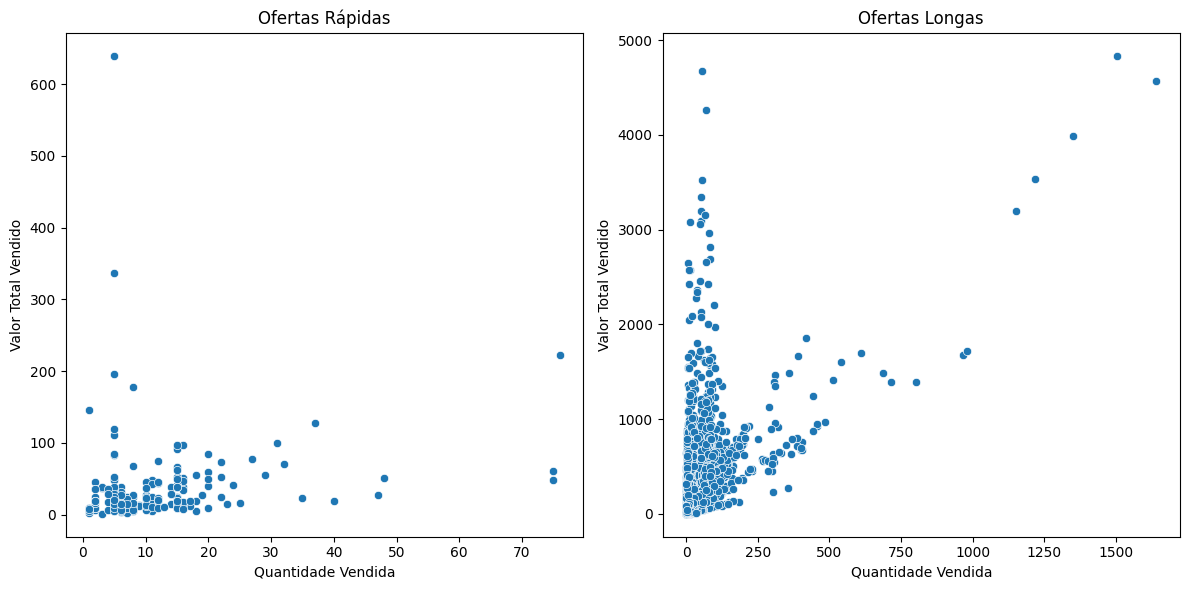

In [ ]:
ofertas_rapidas = dados[dados['DURATION_HOURS'] < 1]
ofertas_longas = dados[dados['DURATION_HOURS'] > 5]

# ofertas rápidas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='SOLD_QUANTITY', y='SOLD_AMOUNT', data=ofertas_rapidas)
plt.title('Ofertas Rápidas')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Valor Total Vendido')

# ofertas longas
plt.subplot(1, 2, 2)
sns.scatterplot(x='SOLD_QUANTITY', y='SOLD_AMOUNT', data=ofertas_longas)
plt.title('Ofertas Longas')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Valor Total Vendido')

plt.tight_layout()
plt.show()


**Ofertas Rápidas:**
1. **Concentração Baixa**: A maioria das ofertas rápidas tem uma quantidade vendida perto de zero, e os valores totais vendidos também são baixos.
2. **Alguns Valores Elevados**: Existem poucas ofertas rápidas que têm uma quantidade consideravelmente alta de itens vendidos, e esses geralmente traduzem em valores totais de vendas mais altos.
3. **Estatísticas**: A quantidade média de itens vendidos para ofertas rápidas é de cerca de 0,886 com um valor médio de venda de R$33,13.

**Ofertas Longas:**
1. **Maior Dispersão**: As ofertas longas apresentam uma maior dispersão tanto em quantidade vendida quanto em valor total vendido.
2. **Concentração em Valores Baixos e Médios**: Embora haja uma dispersão maior, a maioria das vendas ainda está concentrada nas faixas mais baixas de quantidade e valor.
3. **Estatísticas**: A quantidade média de itens vendidos para ofertas longas é de cerca de 4,094 com um valor médio de venda de R$49,93.

**Insights:**
* **Ofertas rápidas não têm impacto significativo no valor total vendido.**
* **Ofertas longas têm um impacto positivo no valor total vendido.**
1. **Consistência com Ofertas Longas**: As ofertas longas têm uma maior consistência em termos de vendas, com uma maior média e um padrão mais uniforme. Isso sugere que elas podem ser menos arriscadas, mas também menos propensas a picos de vendas.

2. **Estratégias de Marketing e Posicionamento**: Pode ser útil reavaliar as ofertas rápidas que não se saíram bem e tentar entender por que. As informações obtidas podem ser usadas para refinar futuras ofertas rápidas. Por outro lado, as ofertas longas podem se beneficiar de estratégias de marketing contínuo e promoções para manter a visibilidade ao longo do tempo.

4. **Análise de Produtos Oferecidos**: Seria interessante analisar quais produtos são frequentemente oferecidos nas ofertas rápidas e longas. Isso poderia ajudar a entender se certos produtos são mais adequados para promoções rápidas, enquanto outros beneficiam-se de exposições mais prolongadas. Por se tratar de um teste com tempo de dedicação limitado, essa exploração mais minuciosa ficará para uma próxima etapa.


## 3.6 : Análise de Categorias e Verticais

### 3.6.1 Principais Categorias de Produtos

In [ ]:
top_categories = dados['DOM_DOMAIN_AGG1'].value_counts().head(10)

print("Principais Categorias de Produtos:")
top_categories

Principais Categorias de Produtos:


HOME&DECOR            6502
APPAREL ACCESORIES    4164
APPAREL               3719
COMPUTERS             3579
SPORTS                3192
PHARMACEUTICS         2950
PERSONAL CARE         2861
ELECTRONICS           2854
MOBILE                1737
AUTOPARTS             1650
Name: DOM_DOMAIN_AGG1, dtype: int64

In [ ]:
# Calcular estatísticas descritivas para essas categorias
top_categories_stats = dados.groupby('DOM_DOMAIN_AGG1').agg({'SOLD_AMOUNT': ['count', 'mean', 'sum']}).sort_values(('SOLD_AMOUNT', 'sum'), ascending=False).head(10)

# Exibir estatísticas descritivas
print("Estatísticas Descritivas para as Principais Categorias:")
top_categories_stats

Estatísticas Descritivas para as Principais Categorias:


SOLD_AMOUNT                       
                         count        mean        sum
DOM_DOMAIN_AGG1                                      
PHARMACEUTICS             2202  199.851812  440073.69
MOBILE                    1038  152.629595  158429.52
ELECTRONICS               1365   87.404696  119307.41
BEAUTY EQUIPMENT           691  128.553184   88830.25
HOME&DECOR                3409   25.741907   87754.16
COMPUTERS                 2112   39.339773   83085.60
APPAREL ACCESORIES        2106   17.358495   36556.99
APPAREL                   1984   18.414415   36534.20
SPORTS                    1700   19.481588   33118.70
INDUSTRY                   521   49.662610   25874.22

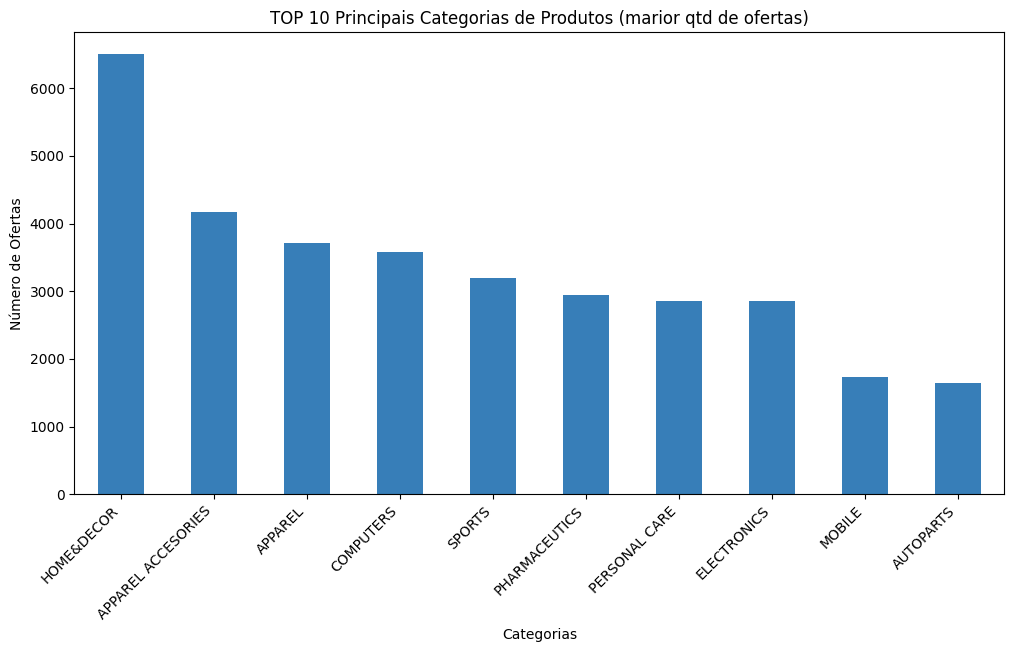

In [ ]:
# Dados das principais categorias de produtos
categorias_counts = dados['DOM_DOMAIN_AGG1'].value_counts().head(10)

plt.figure(figsize=(12, 6))
categorias_counts.plot(kind='bar', color=palette[1])
plt.title('TOP 10 Principais Categorias de Produtos (marior qtd de ofertas)')
plt.xlabel('Categorias')
plt.ylabel('Número de Ofertas')
plt.xticks(rotation=45, ha='right')
plt.show()


1. **Liderança de Home&Decor**: Além de ser a categoria com mais ofertas fechadas em até 2h (tópico 3.2.1) a categoria é claramente a líder em número de ofertas, com mais de 6000 ofertas, o que é quase o dobro do número da segunda categoria mais popular, "Apparel Accessories".
2. **Categorias em Alta**: "Apparel", "Computers" e "Sports" estão praticamente empatadas em número de ofertas, variando entre 3000 e 4000 ofertas.
4. **Categoria com Menor Volume**: A categoria "Autoparts" possui o menor volume entre as dez principais, mas ainda assim figura no top 10, mostrando sua relevância no mix de ofertas.

**Insights gerias:**

1. **Farmacêuticos em Alta**: Embora "Pharmaceutics" não seja a categoria com o maior número de ofertas, é a líder em termos de receita total de vendas, com um total de 440, isso muito provavelmente se deve a época da pandemia.
2. **Média de Vendas**: A categoria "Mobile" tem a segunda maior receita total e também uma média de venda considerável de 152.63 por oferta.
3. **Home&Decor e Quantidade**: Apesar de "Home&Decor" liderar em termos de número de ofertas, a média de venda por oferta é de apenas 25.74, o que sugere que essa categoria pode se beneficiar de promoções frequentes ou de uma variedade maior de produtos.

**Implicações Estratégicas:**

1. **Maximizar Receitas**: Durante o período informado, para maximizar as receitas, poderia ser benéfico promover mais produtos dentro da categoria "Pharmaceutics", dado seu alto valor médio de venda e receita total durante a pandemia, para saber se faz sentido manter a estratégia, sugiro analizar uma base mais recente para entender o novo padrão de consumo pós pandemia.
2. **Promoções em Categorias de Alto Rendimento**: Considerando a média de venda, pode ser benéfico promover mais frequentemente categorias como "Mobile", "Electronics" e "Computers".

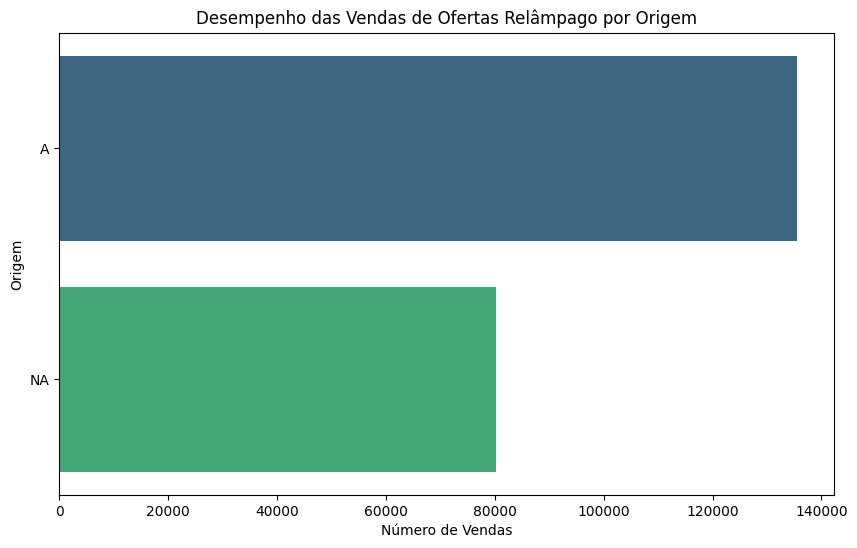

In [ ]:
dados_vendas = dados[dados['SOLD_QUANTITY'] > 0]

# Agrupar por ORIGIN e contar o número de vendas em cada origem
contagem_vendas_por_origem = dados_vendas.groupby('ORIGIN')['SOLD_QUANTITY'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='SOLD_QUANTITY', y='ORIGIN', data=contagem_vendas_por_origem, palette='viridis')

plt.xlabel('Número de Vendas')
plt.ylabel('Origem')
plt.title('Desempenho das Vendas de Ofertas Relâmpago por Origem')

plt.show()


# Perguntas enviadas por email

**DESAFIO 1:**

Considerando que a possível descrição dos campos são:
*	OFFER_START_DATE: Data de início da oferta.
*	OFFER_START_DTTM: Data e hora de início da oferta.
*	OFFER_FINISH_DTTM: Data e hora de término da oferta.
*	OFFER_TYPE: Tipo de oferta ("lightning_deal" neste caso).
*	INVOLVED_STOCK: Estoque envolvido na oferta.
*	REMAINING_STOCK_AFTER_END: Estoque remanescente após o término da oferta.
*	SOLD_AMOUNT: Valor total vendido.
*	SOLD_QUANTITY: Quantidade total vendida.
*	ORIGIN: Origem da oferta (“A” ou “NA”)
*	SHIPPING_PAYMENT_TYPE: Tipo de pagamento do frete.
*	DOM_DOMAIN_AGG1: Categoria ou domínio do produto.
*	VERTICAL: Categoria vertical do produto.
*	DOMAIN_ID: ID do domínio do produto.


## **PERGUNTA 1**

No arquivo ofertas_relampago.csv pode conter registros repetidos duplicadas ou triplicadas, ou seja, registros idênticos em todas as colunas?

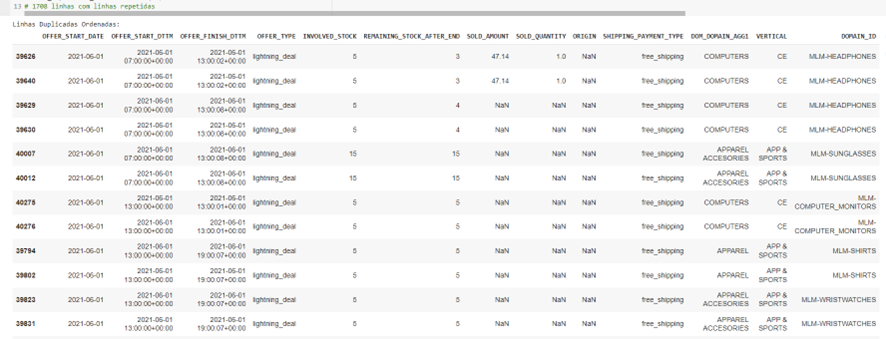


**Pergunta:** Posso seguir com a deleção desses registros repetidos? Ou tem alguma justificativa para essas replicações?

## **PERGUNTA 2:**
Os valores negativos em REMAINING_STOCK_AFTER_END parecem inconsistentes com a interpretação de que representa o estoque remanescente após o término da oferta. Normalmente, não seria possível ter um estoque remanescente negativo, pois implicaria em vender mais unidades do que o estoque original envolvido. uma tem alguma interpretação diferente do que REMAINING_STOCK_AFTER_END representa?

**Pergunta:** Devo considerar os valores negativos como “0” ou poddo manter como estão, considerando que vendas superiores ao esperado resultem em reposições de estoque? (Apesar de que isso pode estar envolvendo possível "perda" de margem de lucro, pois estão vendendo a mais do q se propuseram a vender na campanha! Mas não vou entrar nesse mérito nesse momento, mas seria uma possível abordagem)


##**PERGUNTA 3:**
Mesmo após o tratamento, o campo `SOLD_AMOUNT` tem valores nulos, com uma representação significativa na base:

CAMPO			QTD REGISTRO NULOS	% DA BASE APÓS AJUSTES
SOLD_AMOUNT   		22001			47.26%

O campo SOLD_AMOUNT é importante para análises de desempenho. Temos algumas abordagens possíveis para tratá-lo:

1.	Excluir os dados nulos da tabela
Isso evitará que os dados nulos afetem os resultados
2.	Substituir os dados nulos pela média dos preenchidos
3.	Apresentar os dados nulos separadamente
4.	Excluir a coluna das análises

**Pergunta:** Poderíamos entrar em abordagens detalhadas sobre as possibilidades desses campos, mas por se tratar de um teste, considera válido seguirmos com o preenchimento dos dados pela média dos dados não nulos por categoria do produto?



##**PERGUNTA 4:**

O Campo `SOLD_QUANTITY` também tem valores nulos

CAMPO			QTD REGISTRO NULOS	% DA BASE
SOLD_QUANTITY 		23272			48.66%

Gostaria de entender melhor se o valor do SOLD_QUANTITY deveria ser um campo calculado de

SOLD_QUANTITY = INVOLVED_STOCK - REMAINING_STOCK_AFTER_END

Se for derivado da fórmula, percebo algumas inconsistências como nulos, e valores que não batem, por exemplo, no primeiro registro, o valor deveria ser 5 e não 4, assim por diante:

(Pode ser também que o campo REMAINNING_STOCK_AFTER_END esteja com os valores inconsistentes, mas nesse caso, vamos considerar que estão corretos. )
Temos 3 abordagens:
1.	Atualizar o valor do campo com base na fórmula
2.	Excluir os nulos dos gráficos
3.	Substituir os dados nulos pela média dos preenchidos

**Pergunta:** Poderíamos entrar em abordagens detalhadas, mas por se tratar de um teste, considera válido seguirmos com a abordagem 1, atualização do valor pela fórmula apresentada acima para deixar o campo com os valores coerentes?


# COmentário geral